In [17]:
%pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 323 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 85.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 47.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 82.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [256]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import sys
sys.path.append(os.path.abspath(".."))



In [257]:
del utility

In [258]:

import utility
print(dir(utility))

['KNNImputer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'apply_knn_imputer', 'cat_data', 'get_binary_and_continuous_columns', 'get_statistical_analysis', 'missing_report', 'np', 'pd', 'plot_boxplots', 'plt', 'smart_impute', 'sns']


In [25]:
pd.set_option('display.max_colwidth', 50)

In [42]:
df = pd.read_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv")

In [49]:
df.shape

(72531, 58)

In [8]:
main_df = pd.read_csv("../DATA/FoodAccessResearchAtlasData2019.csv")

In [10]:
main_df.columns[135]

'TractLOWI'

In [11]:
df.drop(columns=['lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1',
       'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1',
       'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1',
       'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share',
       'lasnap1', 'lasnap1share', 'TractLOWI'], inplace=True)

In [12]:
df.shape

(72531, 69)

In [13]:
other_drops = [
    'LILATracts_1And10', 'LILATracts_1And20',
    'LA1and10', 'LA1and20', 
    'LATracts1', 'LATracts10', 'LATracts20', 
    'LAPOP1_10', 'LAPOP1_20',
    'LALOWI1_10', 'LALOWI1_20']
df.drop(columns=other_drops, inplace=True)

In [14]:
df.shape

(72531, 58)

In [15]:
df.to_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv", index=False)

In [23]:
geo_df = gpd.read_file("../DATA/cb_2023_us_tract_5m/cb_2023_us_tract_5m.shp",)

In [26]:
geo_df.head()

STATEFP COUNTYFP TRACTCE               GEOIDFQ        GEOID     NAME  \
0      04      023  966401  1400000US04023966401  04023966401  9664.01   
1      06      037  800412  1400000US06037800412  06037800412  8004.12   
2      06      037  577300  1400000US06037577300  06037577300     5773   
3      06      045  010400  1400000US06045010400  06045010400      104   
4      09      150  901102  1400000US09150901102  09150901102  9011.02   

               NAMELSAD STUSPS                                NAMELSADCO  \
0  Census Tract 9664.01     AZ                         Santa Cruz County   
1  Census Tract 8004.12     CA                        Los Angeles County   
2     Census Tract 5773     CA                        Los Angeles County   
3      Census Tract 104     CA                          Mendocino County   
4  Census Tract 9011.02     CT  Northeastern Connecticut Planning Region   

    STATE_NAME LSAD      ALAND   AWATER  \
0      Arizona   CT    8017697     7850   
1   California   CT    7171172  4017651   
2   California   CT     906095  2302747   
3   California   CT    7024716  2704339   
4  Connecticut   CT  112448002  1434941   

                                            geometry  
0  POLYGON ((-110.96808 31.33514, -110.95336 31.3...  
1  POLYGON ((-118.82156 34.01394, -118.78625 34.0...  
2  POLYGON ((-118.14156 33.76181, -118.13012 33.7...  
3  POLYGON ((-123.81469 39.44654, -123.8043 39.47...  
4  POLYGON ((-72.09973 42.0288, -72.0635 42.02735...

In [34]:
geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
df["CensusTract"] = df["CensusTract"].astype(str)

In [44]:
merged_data = df.merge(geo_df, left_on='CensusTract', right_on='GEOID', how='left')

In [48]:
merged_data.isna().sum().to_dict()

{'CensusTract': 0,
 'State': 0,
 'County': 0,
 'Urban': 0,
 'Pop2010': 0,
 'OHU2010': 0,
 'GroupQuartersFlag': 0,
 'NUMGQTRS': 0,
 'PCTGQTRS': 0,
 'LILATracts_halfAnd10': 0,
 'LILATracts_Vehicle': 0,
 'HUNVFlag': 0,
 'LowIncomeTracts': 0,
 'PovertyRate': 0,
 'MedianFamilyIncome': 0,
 'LAhalfand10': 0,
 'LATracts_half': 0,
 'LATractsVehicle_20': 0,
 'LAPOP05_10': 0,
 'LALOWI05_10': 0,
 'lapophalf': 0,
 'lapophalfshare': 0,
 'lalowihalf': 0,
 'lalowihalfshare': 0,
 'lakidshalf': 0,
 'lakidshalfshare': 0,
 'laseniorshalf': 0,
 'laseniorshalfshare': 0,
 'lawhitehalf': 0,
 'lawhitehalfshare': 0,
 'lablackhalf': 0,
 'lablackhalfshare': 0,
 'laasianhalf': 0,
 'laasianhalfshare': 0,
 'lanhopihalf': 0,
 'lanhopihalfshare': 0,
 'laaianhalf': 0,
 'laaianhalfshare': 0,
 'laomultirhalf': 0,
 'laomultirhalfshare': 0,
 'lahisphalf': 0,
 'lahisphalfshare': 0,
 'lahunvhalf': 0,
 'lahunvhalfshare': 0,
 'lasnaphalf': 0,
 'lasnaphalfshare': 0,
 'TractKids': 0,
 'TractSeniors': 0,
 'TractWhite': 0,
 'Tract

In [50]:
cat_attrs = ['County','Urban', 'GroupQuartersFlag', 
    'LILATracts_halfAnd10', 'LILATracts_Vehicle', 
    'HUNVFlag', 'LowIncomeTracts',
    'LAhalfand10', 'LATracts_half',
    'LATractsVehicle_20']

In [51]:
for cat in cat_attrs:
    df[cat] = df[cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CensusTract           72531 non-null  object  
 1   State                 72531 non-null  object  
 2   County                72531 non-null  category
 3   Urban                 72531 non-null  category
 4   Pop2010               72531 non-null  int64   
 5   OHU2010               72531 non-null  int64   
 6   GroupQuartersFlag     72531 non-null  category
 7   NUMGQTRS              72531 non-null  float64 
 8   PCTGQTRS              72531 non-null  float64 
 9   LILATracts_halfAnd10  72531 non-null  category
 10  LILATracts_Vehicle    72531 non-null  category
 11  HUNVFlag              72531 non-null  category
 12  LowIncomeTracts       72531 non-null  category
 13  PovertyRate           72531 non-null  float64 
 14  MedianFamilyIncome    72531 non-null  float64 
 15  LA

In [52]:
df['is_desert'].value_counts()

is_desert
0    63977
1     8554
Name: count, dtype: int64

In [61]:
binary_target = df['is_desert'].value_counts().to_frame().reset_index()
binary_target.columns = ['is_desert', 'count']  # Rename columns

melt_bin_tar = pd.melt(binary_target, id_vars='is_desert', value_vars='count')
melt_bin_tar.replace({0: 'No', 1: 'Yes'}, inplace=True)


In [62]:
melt_bin_tar

is_desert variable  value
0        No    count  63977
1       Yes    count   8554

Text(0.5, 0, '')

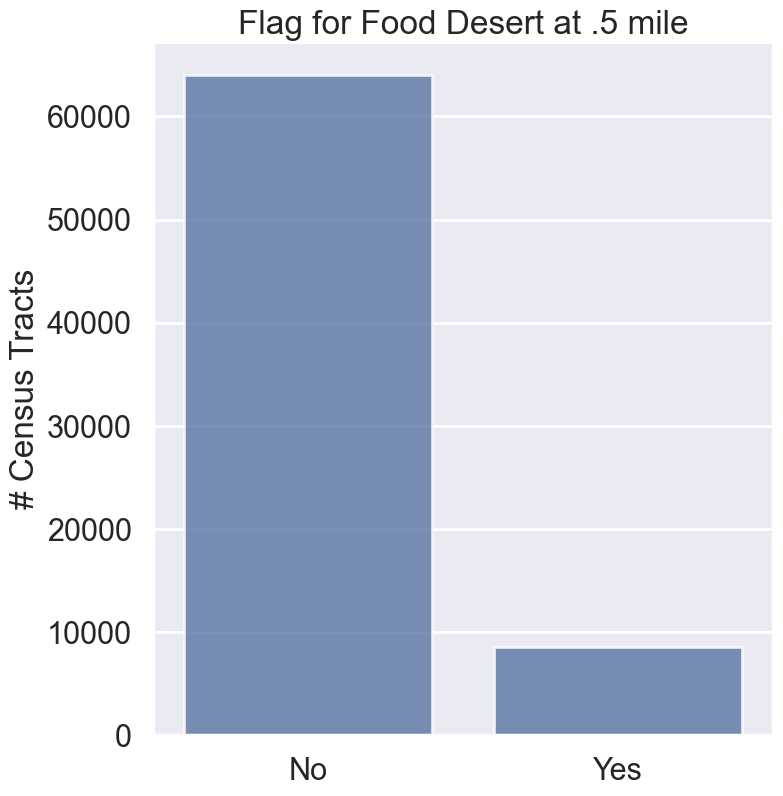

In [64]:
sns.set_theme('poster')
plt.figure(figsize=(8,9))
sns.barplot(x=melt_bin_tar['is_desert'], 
            y=melt_bin_tar['value'], 
            alpha = .80)
plt.title('Flag for Food Desert at .5 mile')
plt.ylabel('# Census Tracts')
plt.xlabel('')

In [70]:
# Get value counts and convert to DataFrame
county_yes = df['County'].loc[df['is_desert'] == 1].value_counts().to_frame()
county_no = df['County'].loc[df['is_desert'] == 0].value_counts().to_frame()

# Rename the 'count' columns to avoid conflict
county_yes.columns = ['food_desert_yes']
county_no.columns = ['food_desert_no']

# Join them on the index (County name)
county_df = county_yes.join(county_no, how='outer')


In [71]:
county_df


food_desert_yes  food_desert_no
County                                                    
Abbeville County                         2               4
Acadia Parish                            2              10
Accomack County                          1               8
Ada County                               3              56
Adair County                             1              21
...                                    ...             ...
Yukon-Koyukuk Census Area                4               0
Yuma County                              1              54
Zapata County                            1               2
Zavala County                            3               1
Ziebach County                           0               1

[1877 rows x 2 columns]

In [133]:
county_df['Rate'] = round((county_df['food_desert_yes'] / 
                     (county_df['food_desert_yes'] + county_df['food_desert_no'])) * 100,2)


In [134]:
county_df

food_desert_yes  food_desert_no   Rate
County                                                    
Mora County                       1               0  100.0
Norton city                       1               0  100.0
Dimmit County                     2               0  100.0
Tunica County                     2               0  100.0
Kemper County                     2               0  100.0
...                             ...             ...    ...
Gulf County                       0               3    0.0
Roger Mills County                0               1    0.0
Rogers County                     0              28    0.0
Rolette County                    0               4    0.0
Ziebach County                    0               1    0.0

[1877 rows x 3 columns]

In [135]:
county_df.replace(np.nan, 0, inplace=True)

In [150]:
county_df.sort_values(by='Rate', ascending=False, inplace=True)

In [151]:
county_df.head(15)

food_desert_yes  food_desert_no    Rate
County                                                             
Yukon-Koyukuk Census Area                 4               0  100.00
Mora County                               1               0  100.00
Lake and Peninsula Borough                1               0  100.00
Kemper County                             2               0  100.00
Dimmit County                             2               0  100.00
Tunica County                             2               0  100.00
Norton city                               1               0  100.00
Bent County                               1               0  100.00
Buena Vista city                          1               0  100.00
Zavala County                             3               1   75.00
Bertie County                             3               1   75.00
Bristol city                              3               1   75.00
Petersburg city                           8               3   72.73
Noxubee County                            2               1   66.67
Bethel Census Area                        2               1   66.67

<Axes: ylabel='County'>

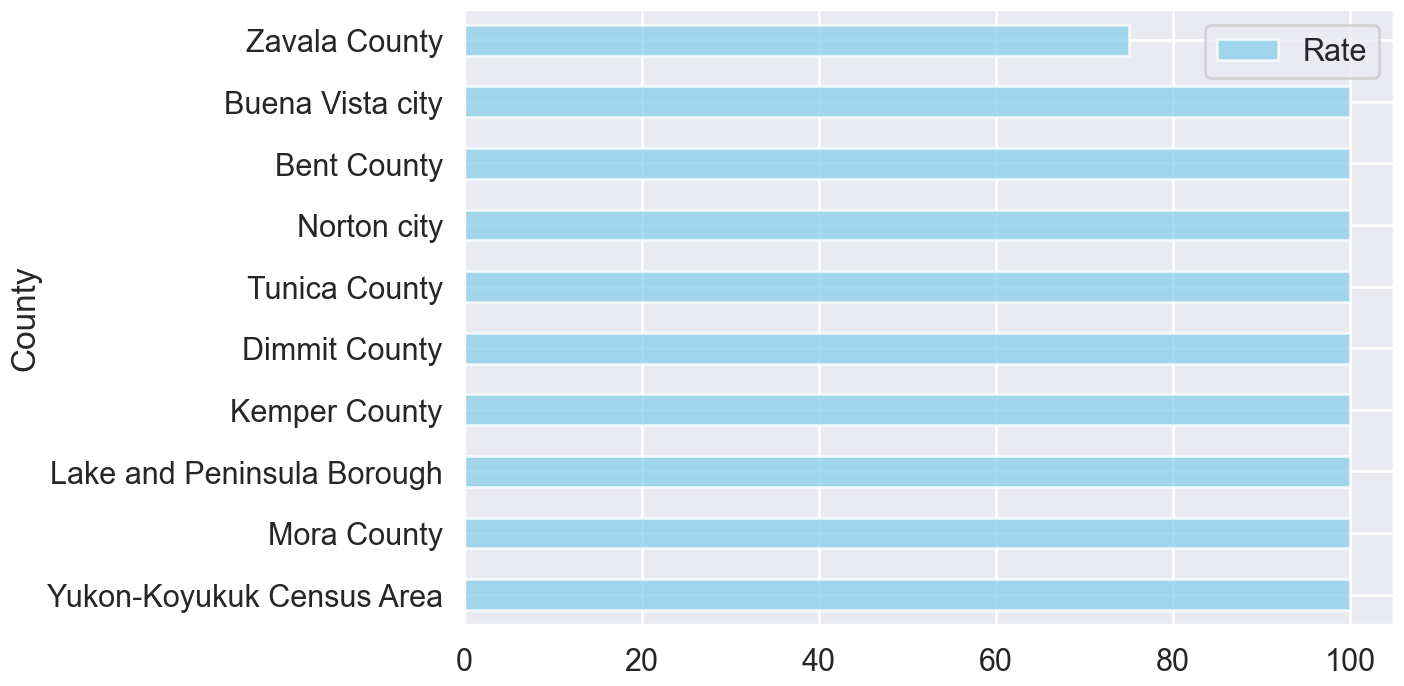

In [162]:
top10_rate.plot(kind='barh',x='County', y='Rate', figsize=(12,8), color='skyblue', alpha=0.75)

In [170]:
top10_count = county_df.sort_values(by='food_desert_yes', ascending=False, inplace=False).reset_index().head(10)

In [171]:
top10_count

County  food_desert_yes  food_desert_no   Rate
0          Cook County              185            1135  14.02
1         Wayne County              178             584  23.36
2     Jefferson County              140             654  17.63
3   Los Angeles County              109            2225   4.67
4        Marion County              109             346  23.96
5      Maricopa County              106             807  11.61
6    Montgomery County              102             730  12.26
7        Dallas County               95             469  16.84
8  Philadelphia County               92             289  24.15
9        Harris County               92             699  11.63

<Axes: ylabel='County'>

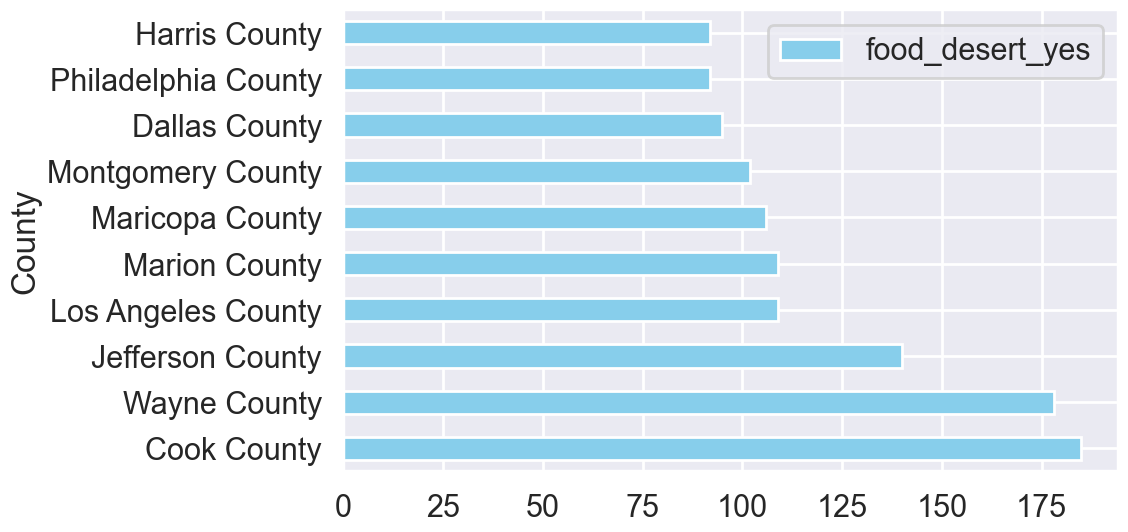

In [172]:
top10_count.plot(x='County', y='food_desert_yes', kind='barh', figsize=(10, 6), color='skyblue')

In [195]:


gdf_tar = gpd.GeoDataFrame(merged_data[['is_desert', 'geometry']], geometry='geometry')
gdf_tar.replace({0: 'No', 1: 'Yes'}, inplace=True)


In [177]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Polygon, LineString, Point

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

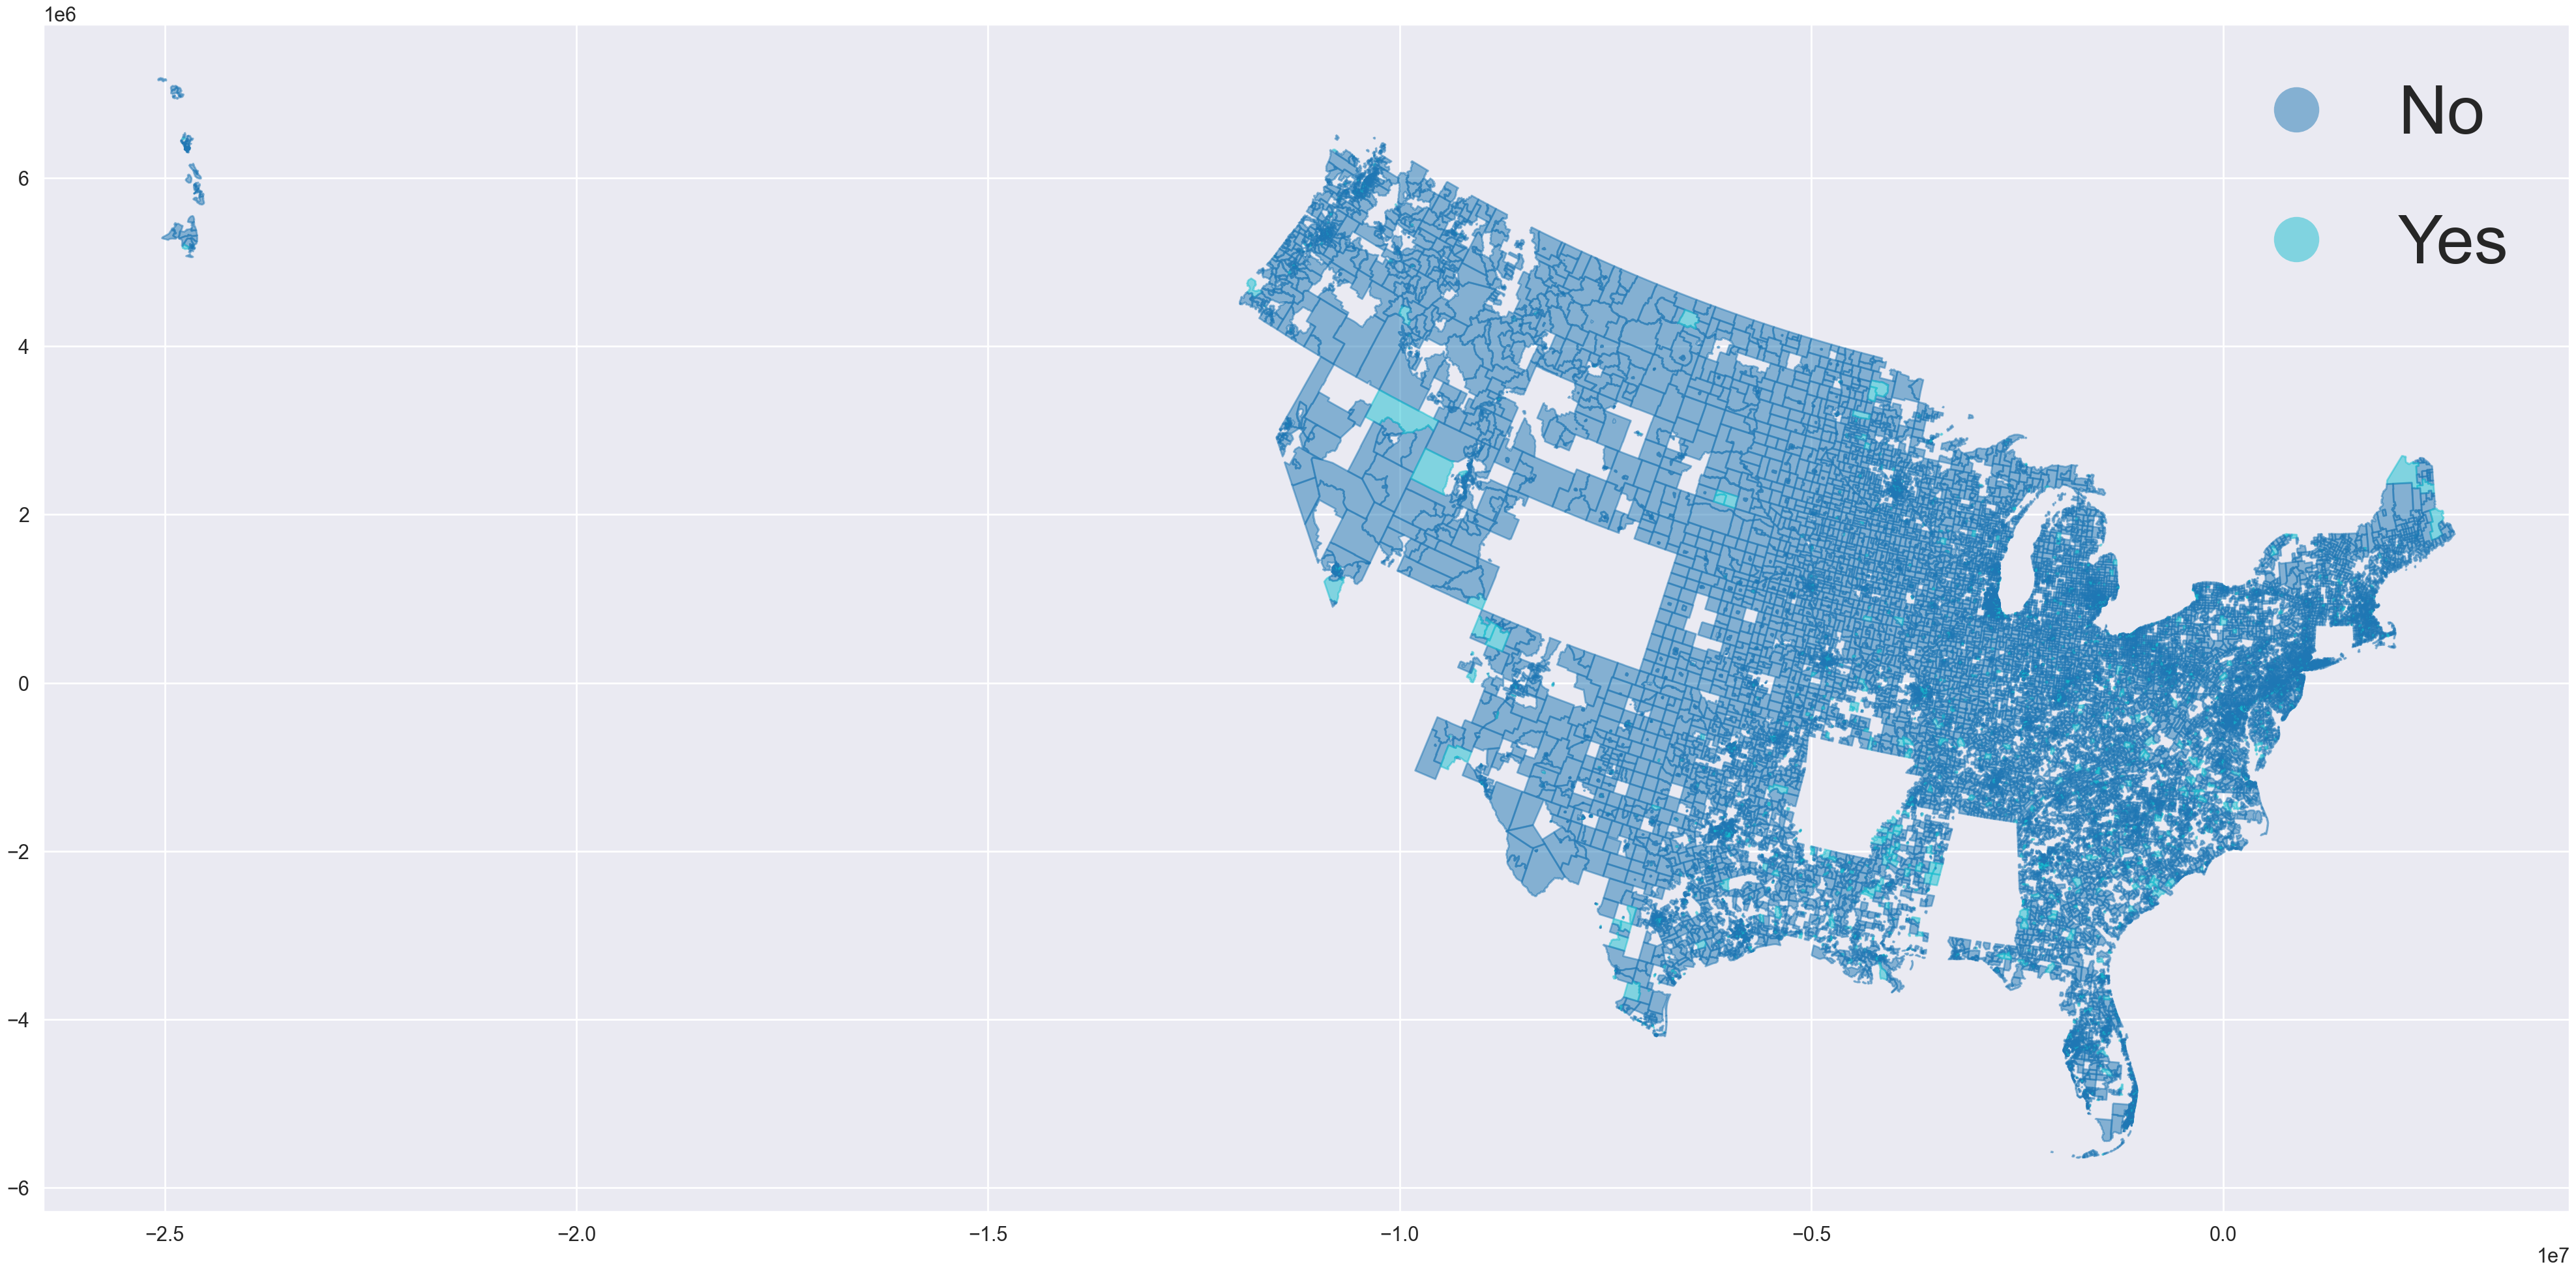

In [204]:
plt.rcParams.update({'legend.handletextpad':.5,
                    'legend.labelspacing':1,
                    'legend.markerscale':5,
                    'legend.fontsize':75,
                    'legend.frameon':False})

# visualize target on map
fig, ax = plt.subplots(figsize=(50, 40))


ax = gdf_tar.plot(column='is_desert',
                legend=True,
                ax=ax,
                edgecolor='face',
                alpha=0.5)

# add north arrow, https://stackoverflow.com/a/58110049/604456
# x, y, arrow_length = 0.85, 0.10, 0.06
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='black', width=20, headwidth=45),
#             ha='center', va='center', fontsize=40,
#             xycoords=ax.transAxes)

# add scale-bar
# ax.add_artist(ScaleBar(1))

# add basemap
ctx.add_basemap(ax, zoom=5, url=ctx.providers.CartoDB.Positron)

# adjust legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((.20,.95))


# add title
ax.set_title(label="NYC Census Tract Flag Food Desert .5 Mile", fontdict={'fontsize': 100}, loc='center')


ax.set_axis_off()

plt.show();

In [192]:
gdf_tar = gdf_tar.to_crs(epsg=3857)

gdf_tar.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [197]:
gdf_tar['geometry'] = gdf_tar['geometry'].buffer(0)


In [198]:
print(gdf_tar.geometry.total_bounds)
print(gdf_tar.is_empty.sum())
print(gdf_tar.geometry.notnull().sum())


[-25078878.80091245  -5644456.77365236   2816259.66554445
   7187392.70214164]
0
49530


In [201]:
from shapely.geometry.base import BaseGeometry

gdf_tar = gdf_tar[gdf_tar['geometry'].apply(lambda g: isinstance(g, BaseGeometry))]


In [203]:
type(gdf_tar.iloc[0]['geometry'])



shapely.geometry.polygon.Polygon

County                  1877
Urban                      2
GroupQuartersFlag          2
LILATracts_halfAnd10       2
LILATracts_Vehicle         2
HUNVFlag                   2
LowIncomeTracts            2
LAhalfand10                2
LATracts_half              2
LATractsVehicle_20         2
dtype: int64


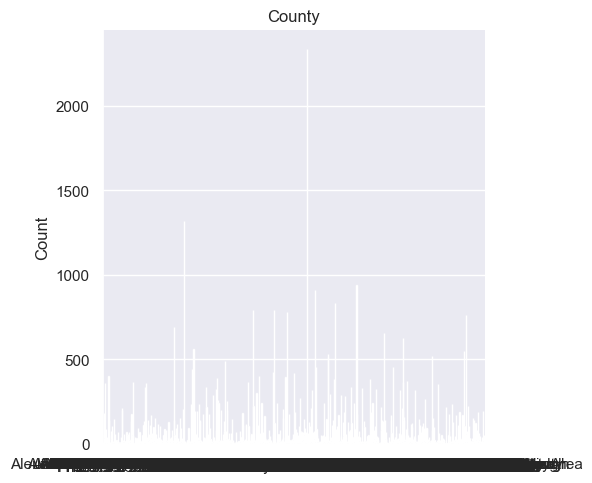

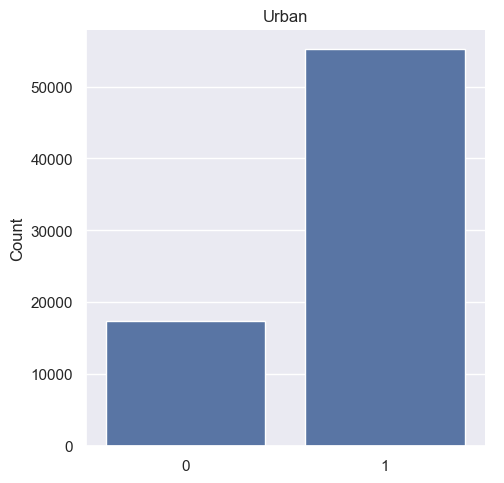

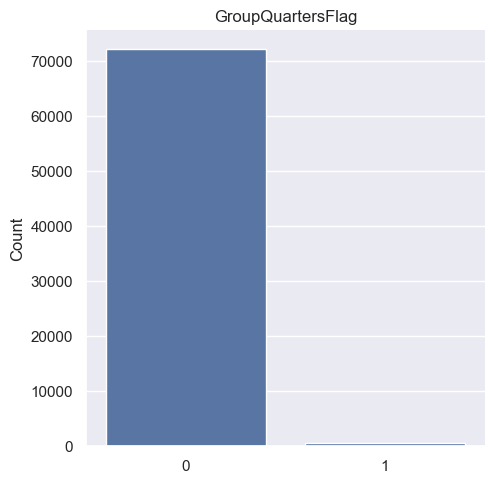

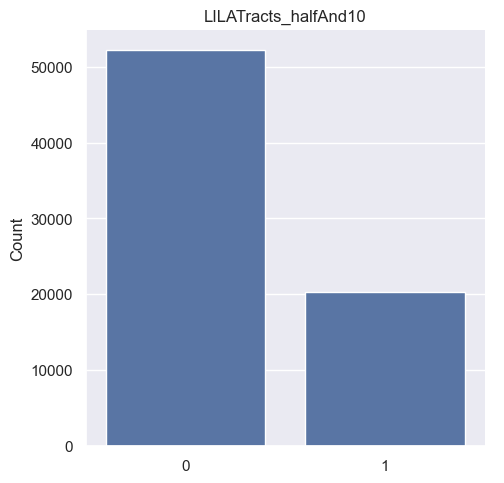

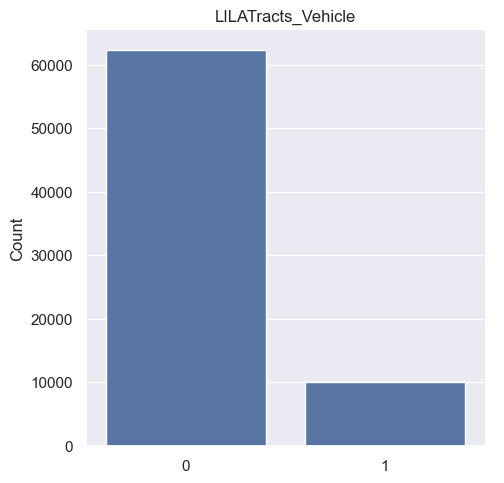

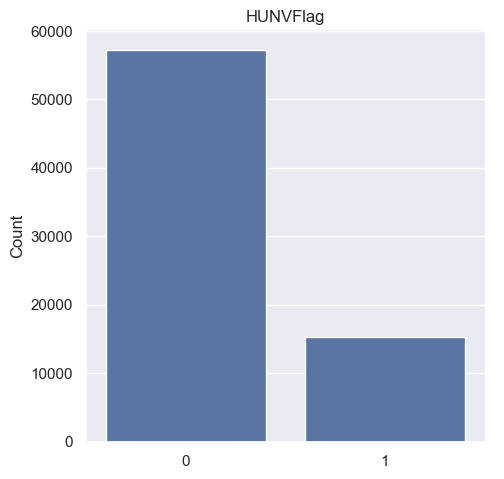

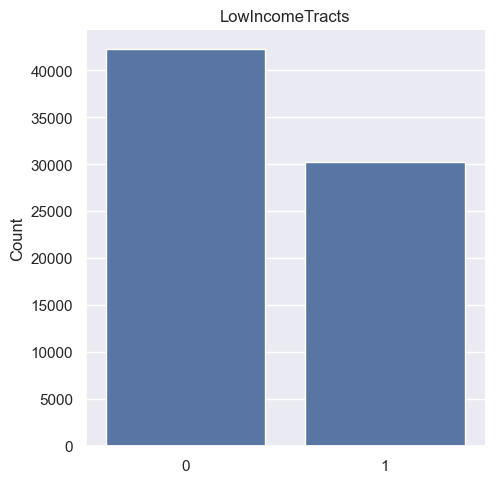

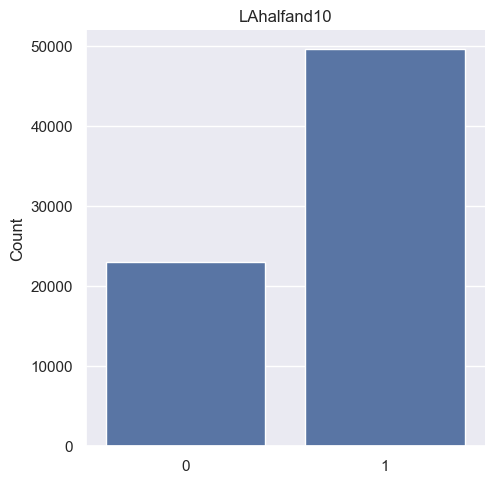

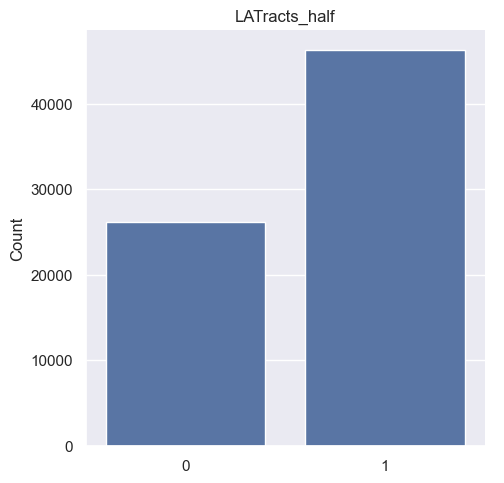

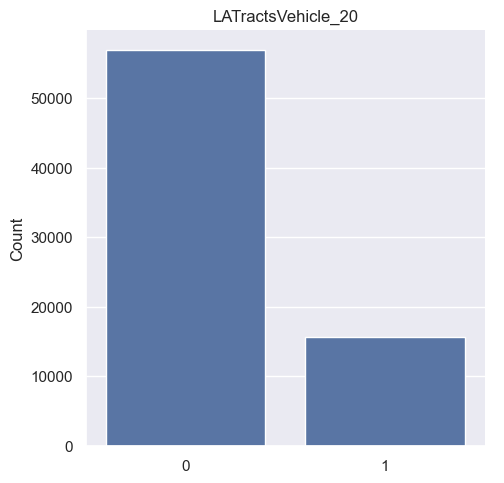

In [211]:
sns.set_theme('notebook') # set labeling to be small these won't be used in presentation or README
cat_data(df)

In [212]:
pd.options.display.max_columns = None
round(df.describe().T,2)

count      mean       std     min       25%       50%  \
Pop2010             72531.0   4256.74   1955.99     1.0   2899.00   4011.00   
OHU2010             72531.0   1609.19    725.68     0.0   1108.00   1525.00   
NUMGQTRS            72531.0    110.09    443.86     0.0      0.00      7.00   
PCTGQTRS            72531.0      2.71      9.57     0.0      0.00      0.18   
PovertyRate         72531.0     15.18     11.92     0.0      6.50     12.00   
MedianFamilyIncome  72531.0  77005.82  37411.16  2499.0  51610.50  68819.00   
LAPOP05_10          72531.0   2559.72   1900.40     0.0   1136.00   2395.00   
LALOWI05_10         72531.0    756.01    714.90     0.0    254.00    582.15   
lapophalf           72531.0   3063.48   1995.88     0.0   1673.00   2805.00   
lapophalfshare      72531.0     71.56     29.43     0.0     51.87     80.52   
lalowihalf          72531.0    915.09    782.70     0.0    356.00    721.00   
lalowihalfshare     72531.0     22.20     16.42     0.0      9.47     18.78   
lakidshalf          72531.0    742.27    577.61     0.0    347.00    642.00   
lakidshalfshare     72531.0     16.91      8.52     0.0     10.92     17.92   
laseniorshalf       72531.0    407.26    324.96     0.0    177.00    353.00   
laseniorshalfshare  72531.0      9.96      7.27     0.0      4.81      9.26   
lawhitehalf         72531.0   2325.00   1774.10     0.0    912.50   2082.00   
lawhitehalfshare    72531.0     54.01     30.77     0.0     27.14     57.55   
lablackhalf         72531.0    343.77    670.01     0.0     22.00     79.00   
lablackhalfshare    72531.0      8.67     16.47     0.0      0.60      1.91   
laasianhalf         72531.0    111.56    262.07     0.0     10.00     31.00   
laasianhalfshare    72531.0      2.35      4.82     0.0      0.29      0.82   
lanhopihalf         72531.0      4.58     32.94     0.0      0.00      1.00   
lanhopihalfshare    72531.0      0.10      0.75     0.0      0.00      0.01   
laaianhalf          72531.0     29.78    167.95     0.0      3.00      9.00   
laaianhalfshare     72531.0      0.76      4.43     0.0      0.09      0.23   
laomultirhalf       72531.0    217.42    323.48     0.0     48.00    107.00   
laomultirhalfshare  72531.0      4.84      6.03     0.0      1.42      2.67   
lahisphalf          72531.0    386.70    722.58     0.0     51.00    133.00   
lahisphalfshare     72531.0      8.38     13.09     0.0      1.49      3.32   
lahunvhalf          72531.0     67.07     78.81     0.0     18.00     43.00   
lahunvhalfshare     72531.0      4.54      5.86     0.0      1.30      2.78   
lasnaphalf          72531.0    129.44    133.88     0.0     32.00     88.00   
lasnaphalfshare     72531.0      8.55      8.93     0.0      2.27      5.77   
TractKids           72531.0   1022.69    615.43     0.0    611.00    924.00   
TractSeniors        72531.0    555.19    351.80     0.0    320.00    497.00   
TractWhite          72531.0   3082.33   1796.32     0.0   1848.00   2914.00   
TractBlack          72531.0    536.74    889.10     0.0     43.00    160.00   
TractAsian          72531.0    202.32    435.87     0.0     17.00     58.00   
TractNHOPI          72531.0      7.45     45.19     0.0      0.00      1.00   
TractAIAN           72531.0     40.15    177.37     0.0      7.00     15.00   
TractOMultir        72531.0    387.65    529.34     0.0     85.00    186.00   
TractHispanic       72531.0    695.95   1119.45     0.0     88.00    243.00   
TractHUNV           72531.0    143.71    232.73     0.0     36.00     82.00   
TractSNAP           72531.0    201.75    185.76     0.0     67.00    152.00   
is_desert           72531.0      0.12      0.32     0.0      0.00      0.00   

                         75%        max  
Pop2010              5330.50   37452.00  
OHU2010              2021.00   16043.00  
NUMGQTRS               64.00   19496.00  
PCTGQTRS                1.56     100.00  
PovertyRate            20.60     100.00  
MedianFamilyIncome  93709.50  250001.00  
LAPOP05_10    

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


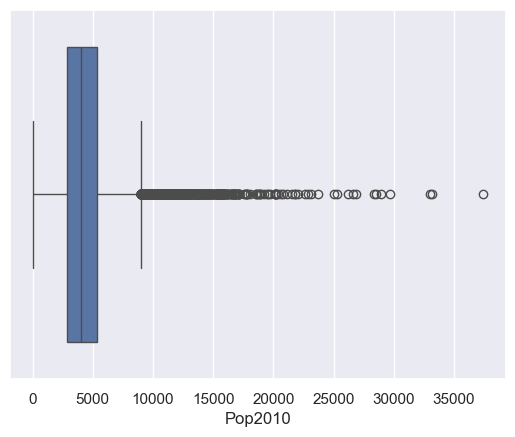

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


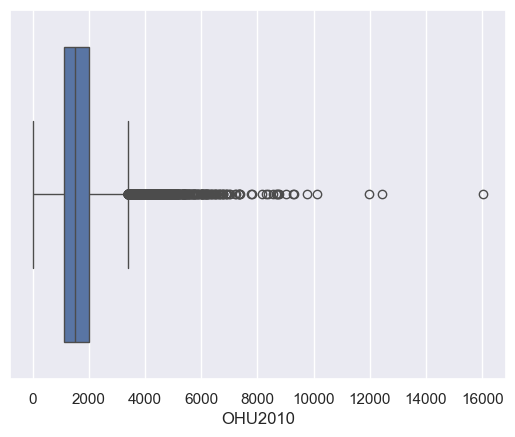

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


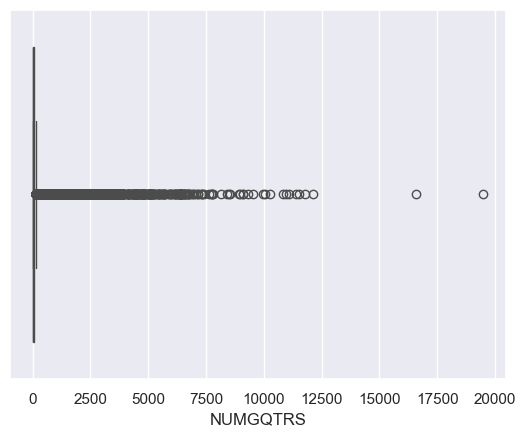

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


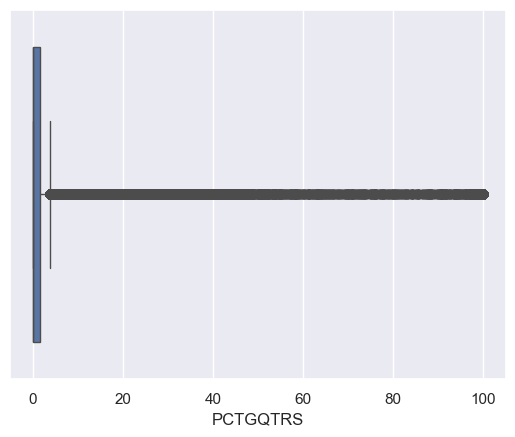

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


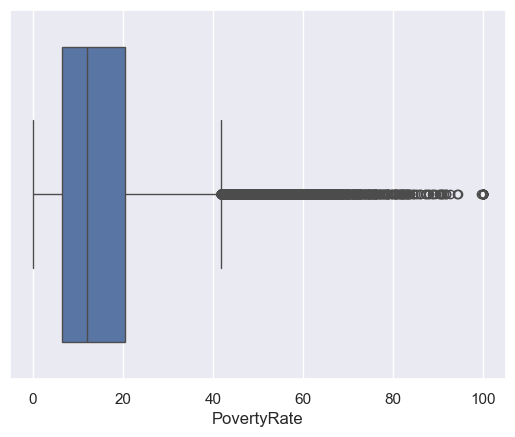

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


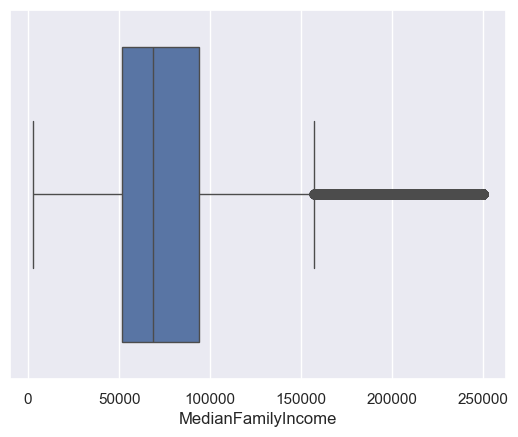

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


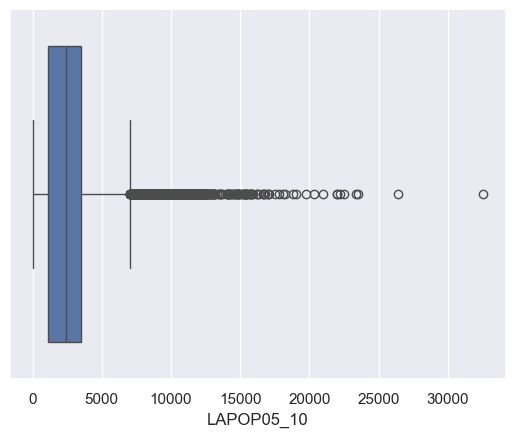

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


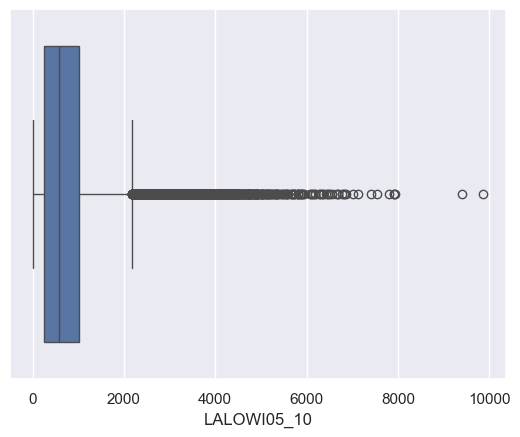

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


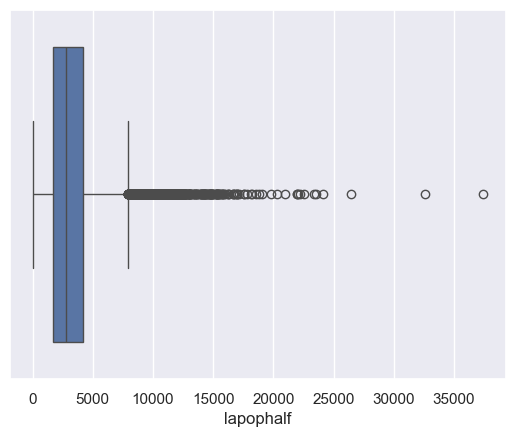

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


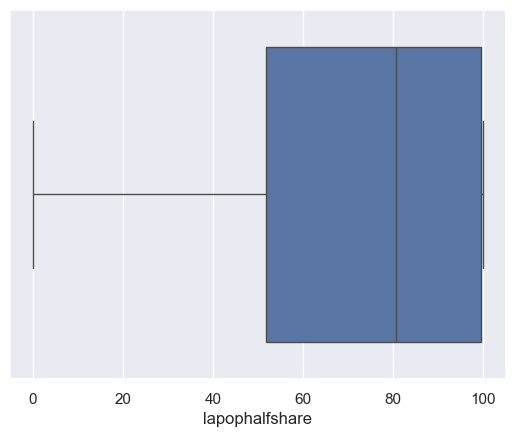

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


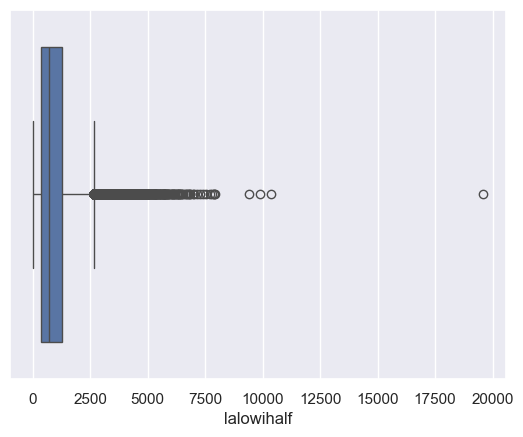

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


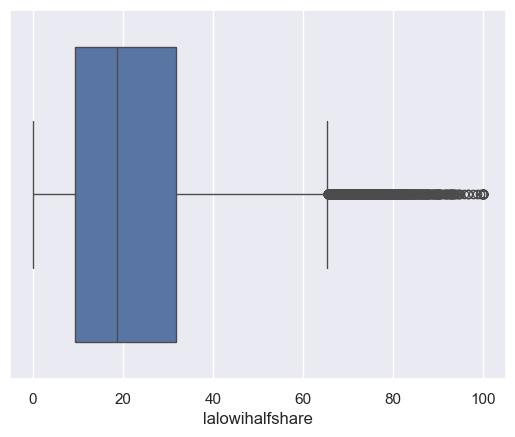

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


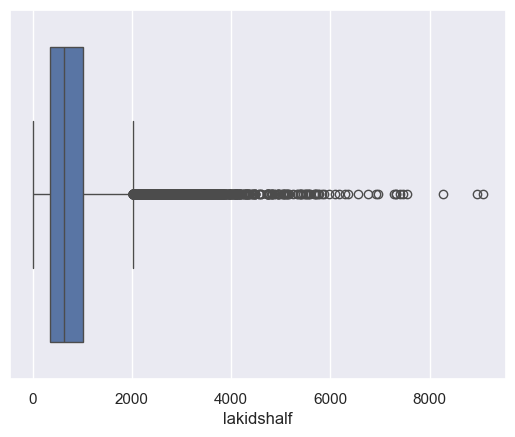

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


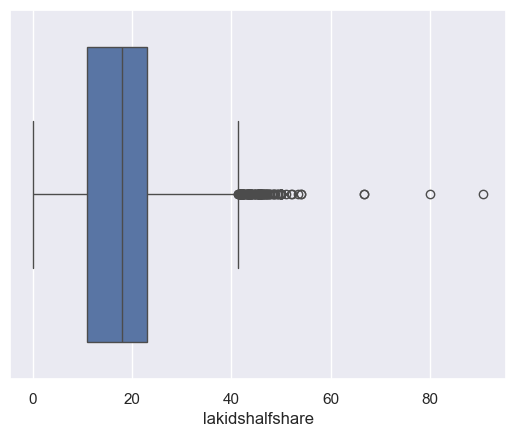

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


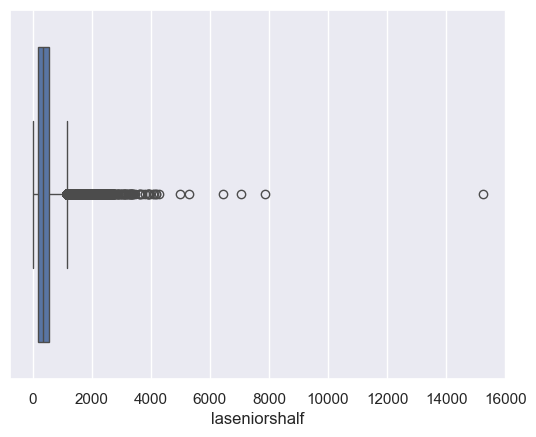

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


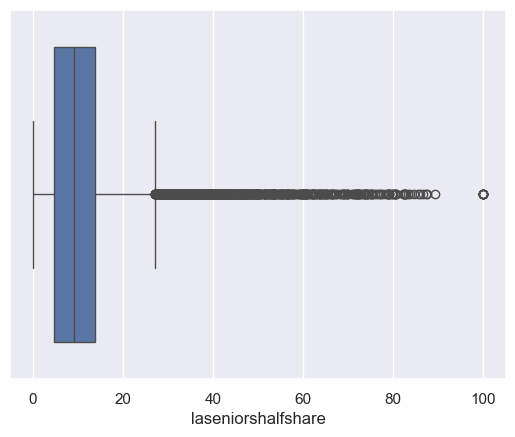

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


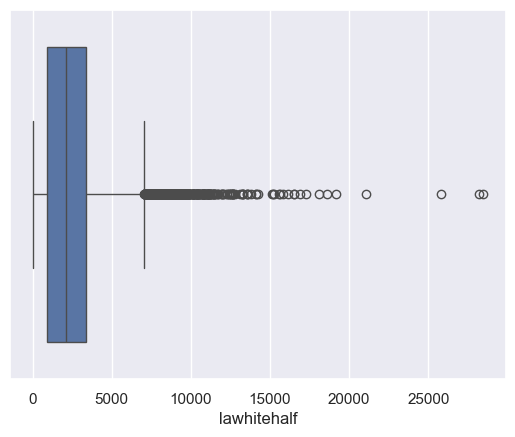

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


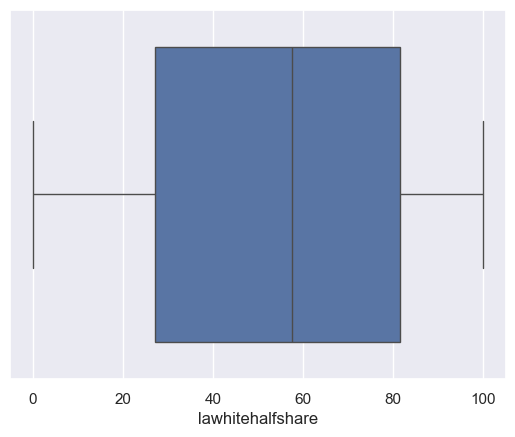

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


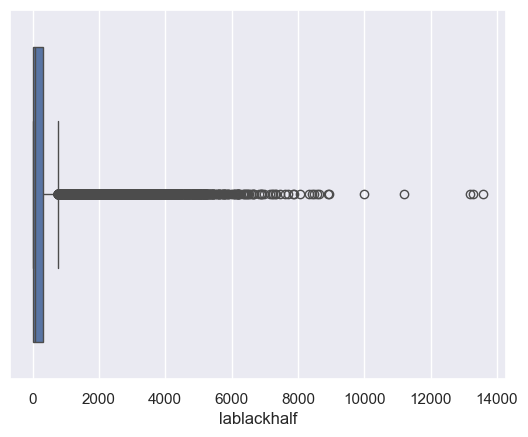

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


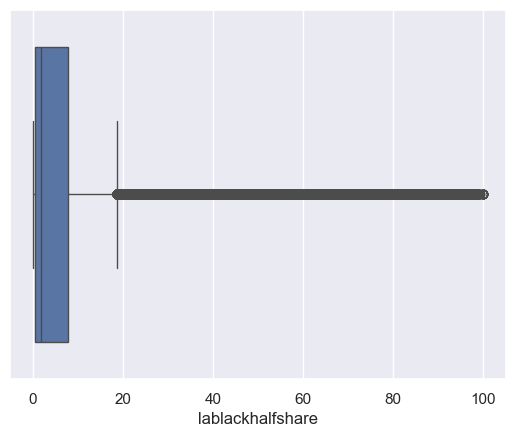

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


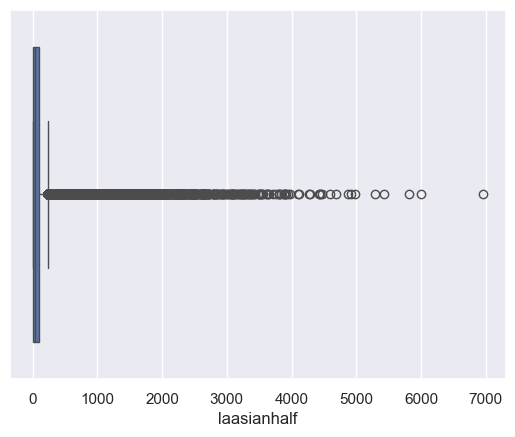

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


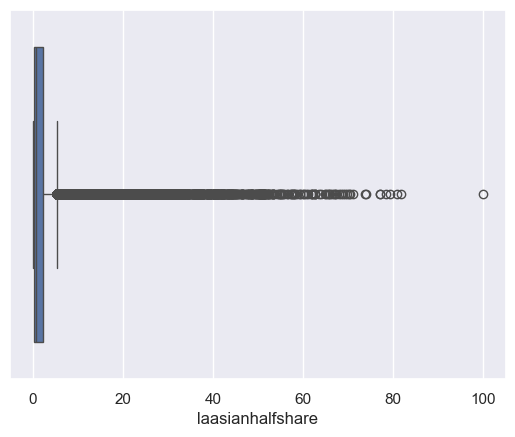

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


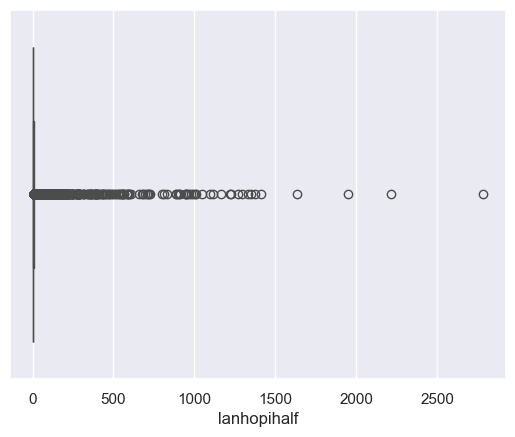

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


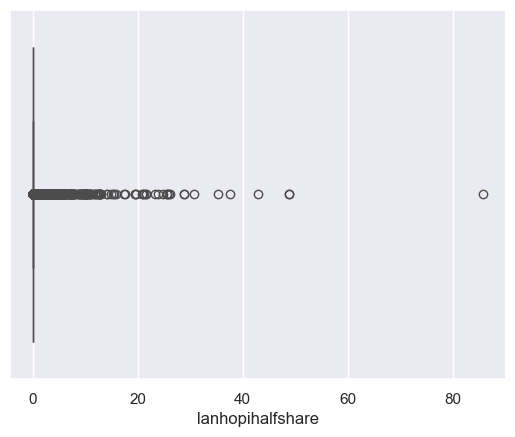

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


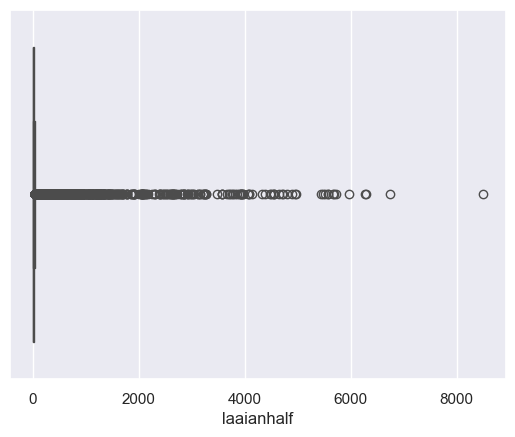

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


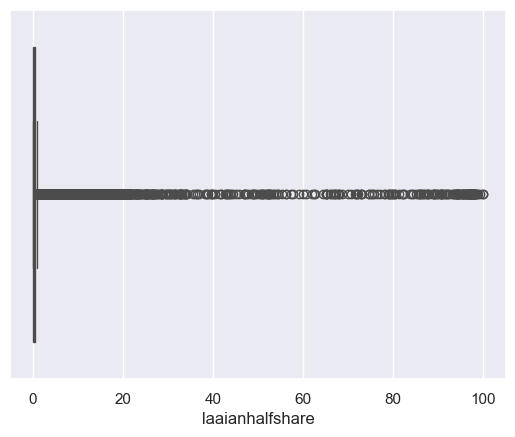

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


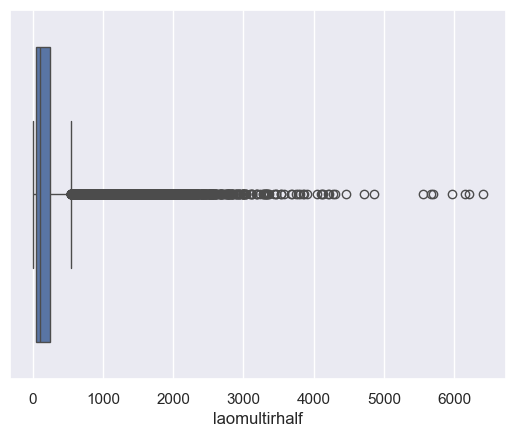

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


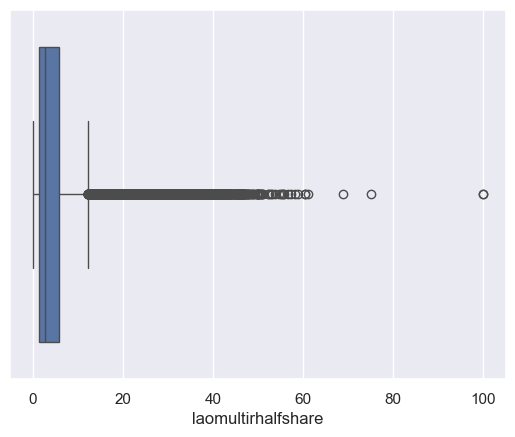

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


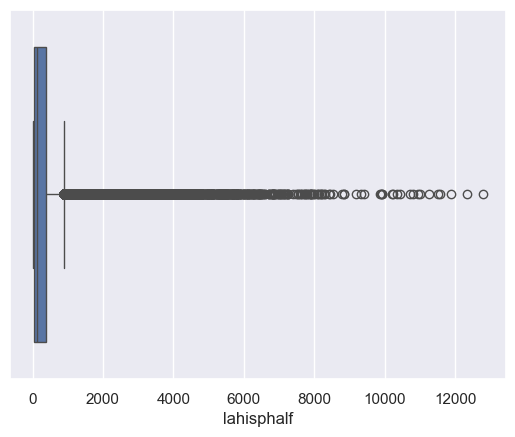

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


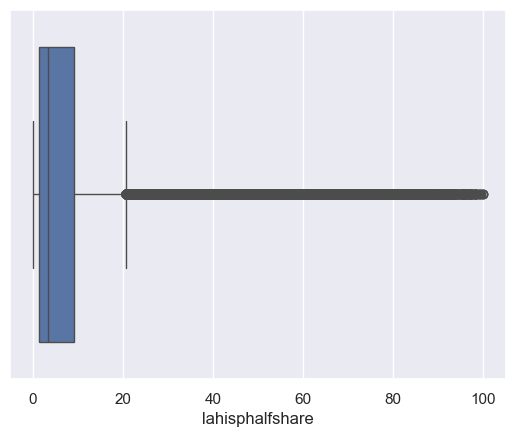

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


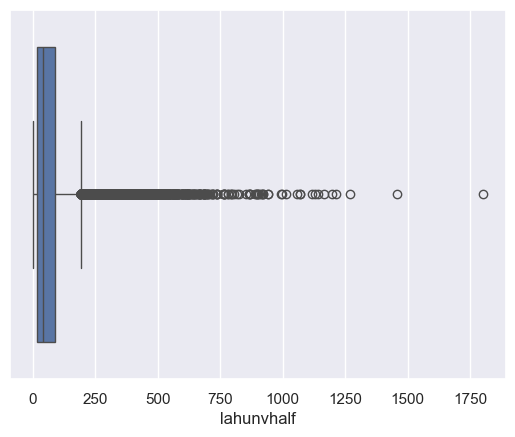

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


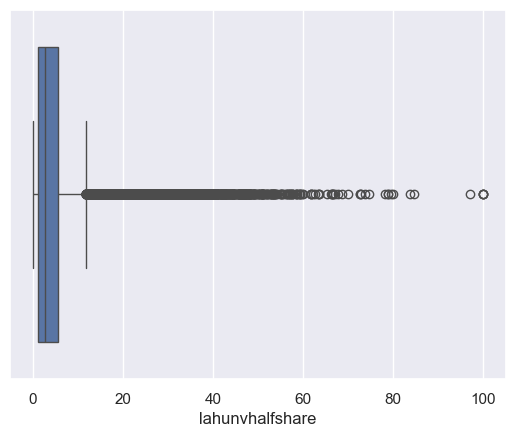

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


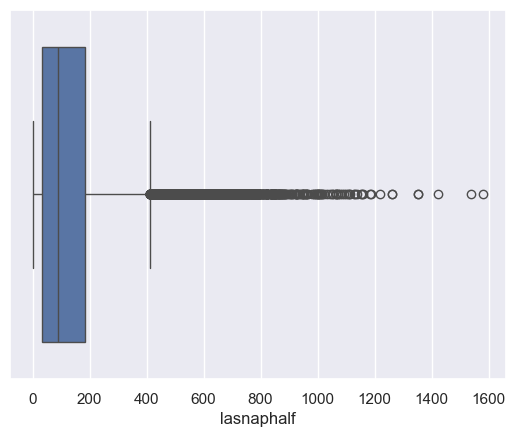

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


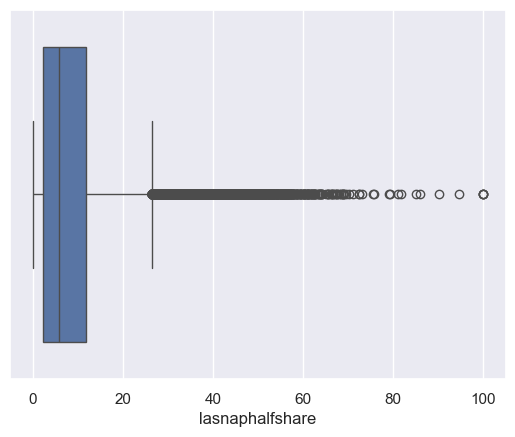

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


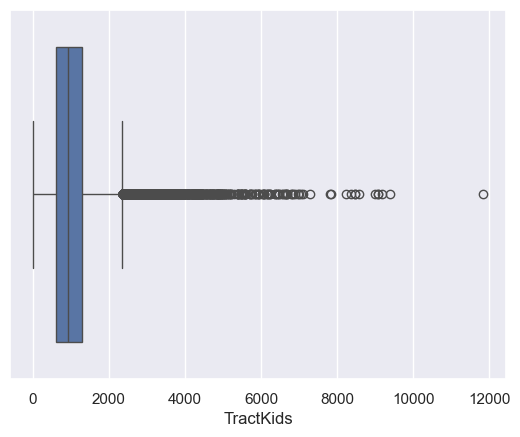

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


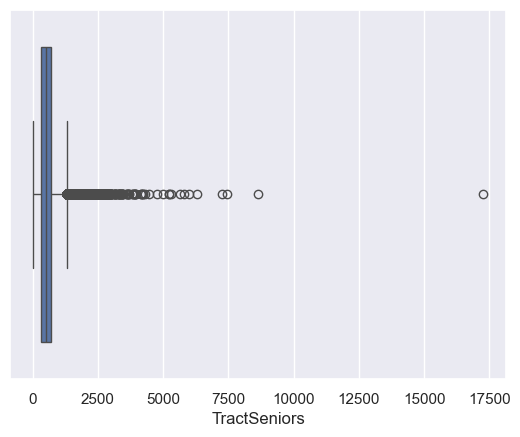

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


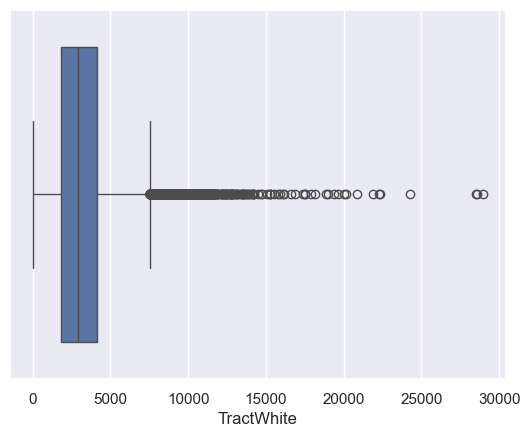

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


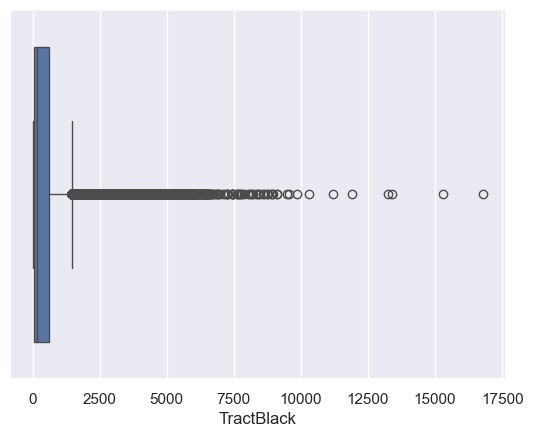

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


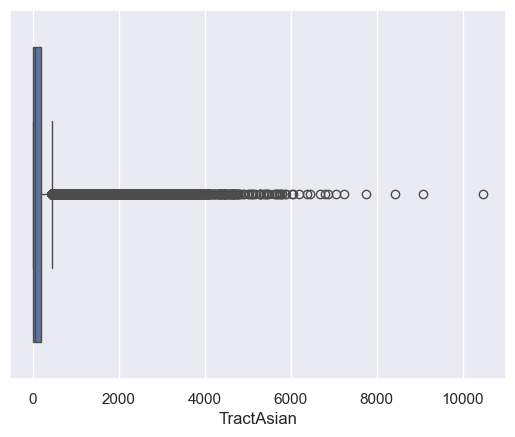

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


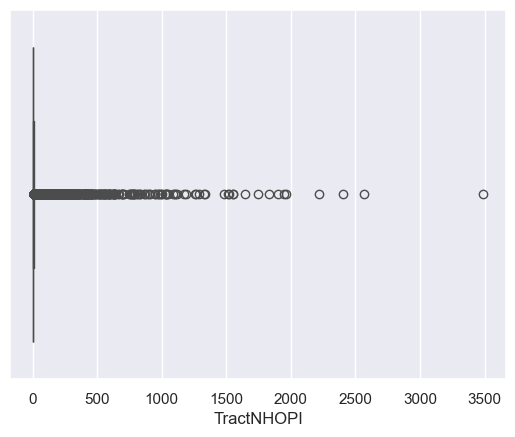

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


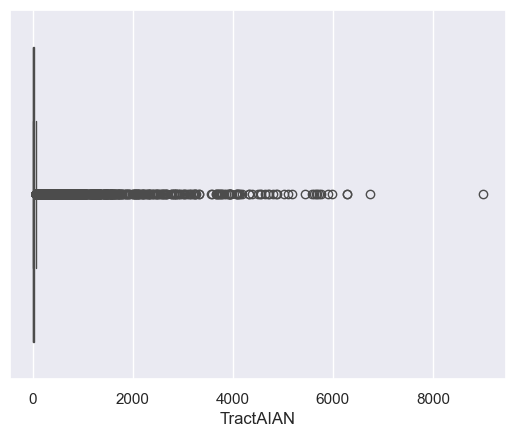

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


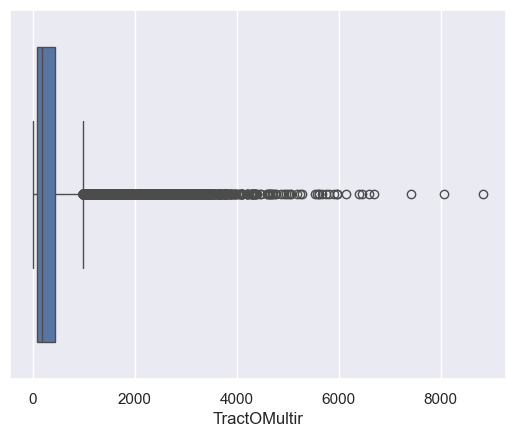

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


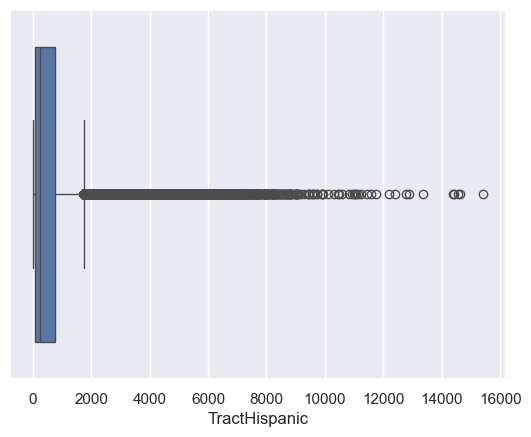

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


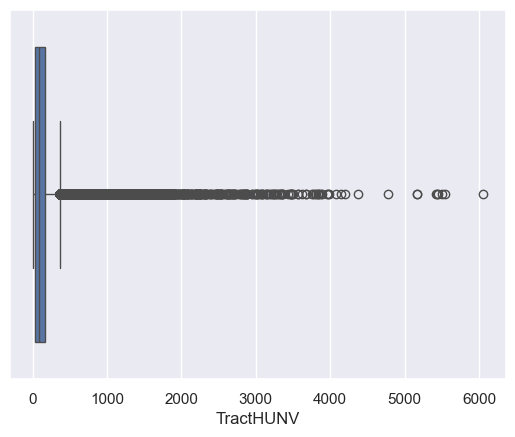

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


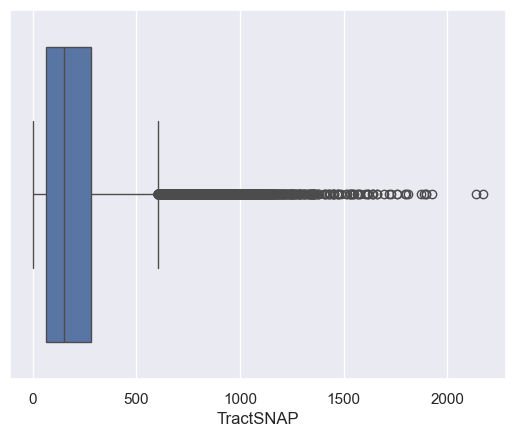

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


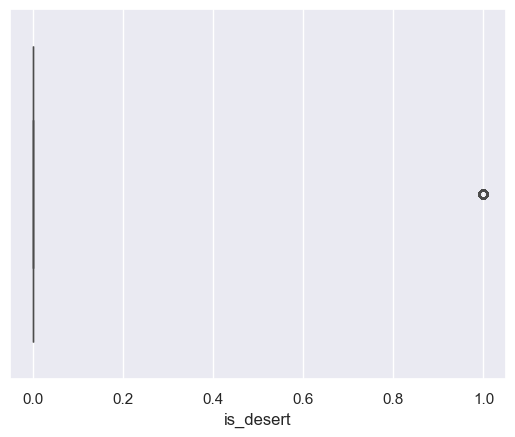

In [215]:
num_data(df)

In [216]:
df_multi = df.select_dtypes(exclude='object')

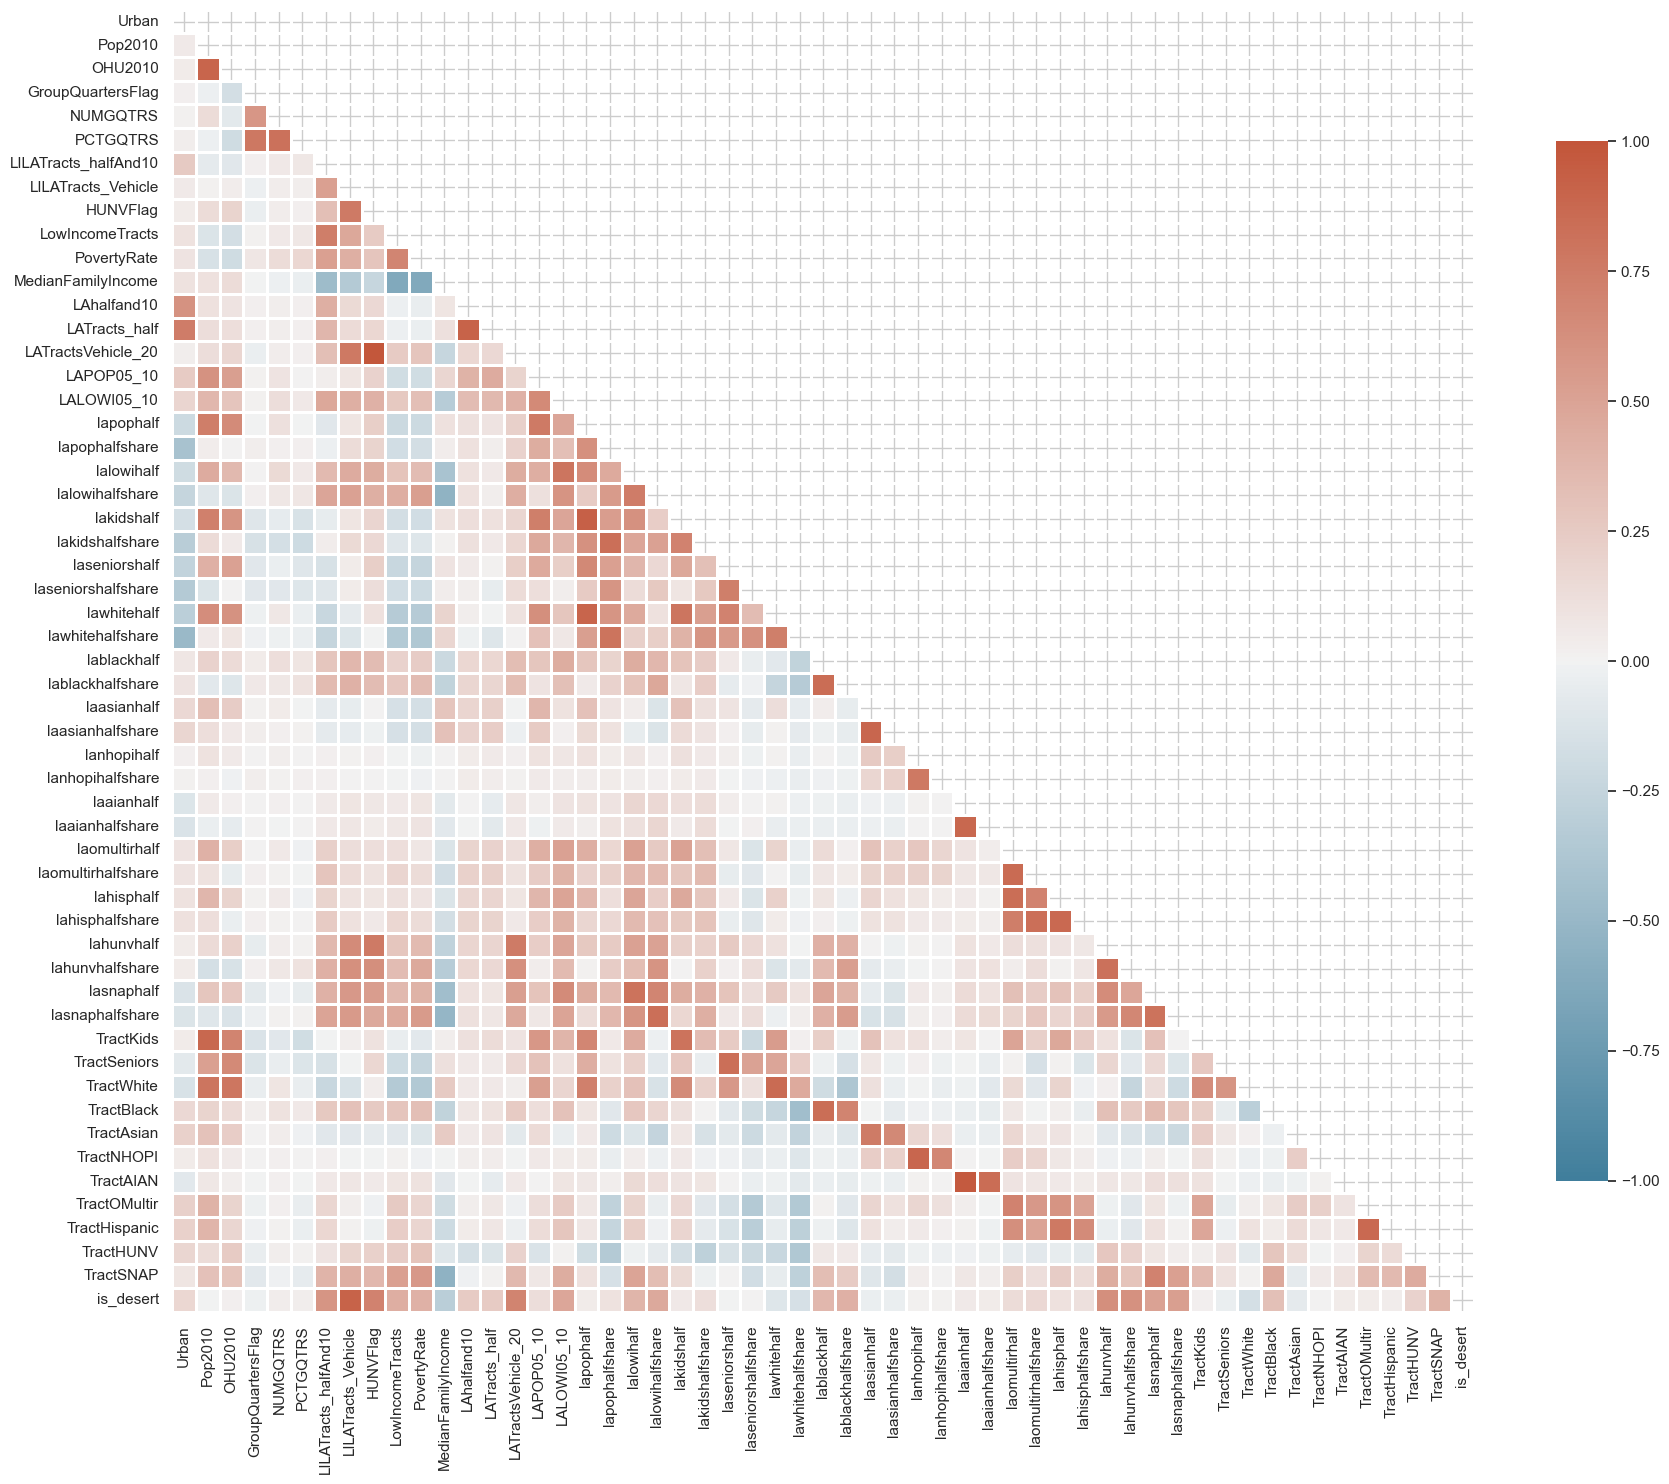

In [222]:
sns.set_theme('notebook')
sns.set_style('whitegrid')

# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = df_multi[[col for col in df_multi.columns if col != 'County']].corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, 
                 mask=mask, 
                 cmap=cmap, 
                 vmax=1, 
                 vmin=-1, 
                 center=0, 
                 square=True, 
                 linewidths=1, 
                 cbar_kws={"shrink": .75}, 
                 annot=False)

In [223]:
# create df with mean share race each LACT by target
white_yes = df['lawhitehalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
white_no = df['lawhitehalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
black_yes = df['lablackhalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
black_no = df['lablackhalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
latino_yes = df['lahisphalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
latino_no = df['lahisphalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
asian_yes = df['laasianhalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
asian_no = df['laasianhalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
native_yes = df['laaianhalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
native_no = df['laaianhalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
multi_yes = df['laomultirhalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
multi_no = df['laomultirhalfshare'].loc[df['is_desert'] == 0].to_frame().mean()
pacific_yes = df['lanhopihalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
pacific_no = df['lanhopihalfshare'].loc[df['is_desert'] == 0].to_frame().mean()

In [224]:
race_share_df = pd.DataFrame({'food_desert_yes':[white_yes['lawhitehalfshare'], 
                                                 black_yes['lablackhalfshare'],
                                                 latino_yes['lahisphalfshare'],
                                                 asian_yes['laasianhalfshare'],
                                                 native_yes['laaianhalfshare'],
                                                 multi_yes['laomultirhalfshare'],
                                                 pacific_yes['lanhopihalfshare']],
                              'food_desert_no':[white_no['lawhitehalfshare'], 
                                                black_no['lablackhalfshare'],
                                                latino_no['lahisphalfshare'],
                                                asian_no['laasianhalfshare'],
                                                native_no['laaianhalfshare'],
                                                multi_no['laomultirhalfshare'],
                                                pacific_no['lanhopihalfshare']]},
                            index=['White', 'Black', 'Latino', 'Asian', 'Native', 'Multi', 'Pacific'])

In [225]:
# name index
race_share_df.index.name = 'Race'

# reset index
race_share_df.reset_index(inplace=True)

In [227]:
race_share_df

Race  food_desert_yes  food_desert_no
0    White        41.261067       55.711447
1    Black        27.640863        6.129410
2   Latino        12.575530        7.823048
3    Asian         1.899611        2.409186
4   Native         1.257769        0.696820
5    Multi         7.520241        4.486322
6  Pacific         0.117137        0.098637

In [229]:
race_share_melted = pd.melt(
    race_share_df,
    id_vars='Race',
    value_vars=['food_desert_yes', 'food_desert_no'],
    var_name='Desert_Status',
    value_name='Share'
)


In [230]:
race_share_melted

Race    Desert_Status      Share
0     White  food_desert_yes  41.261067
1     Black  food_desert_yes  27.640863
2    Latino  food_desert_yes  12.575530
3     Asian  food_desert_yes   1.899611
4    Native  food_desert_yes   1.257769
5     Multi  food_desert_yes   7.520241
6   Pacific  food_desert_yes   0.117137
7     White   food_desert_no  55.711447
8     Black   food_desert_no   6.129410
9    Latino   food_desert_no   7.823048
10    Asian   food_desert_no   2.409186
11   Native   food_desert_no   0.696820
12    Multi   food_desert_no   4.486322
13  Pacific   food_desert_no   0.098637

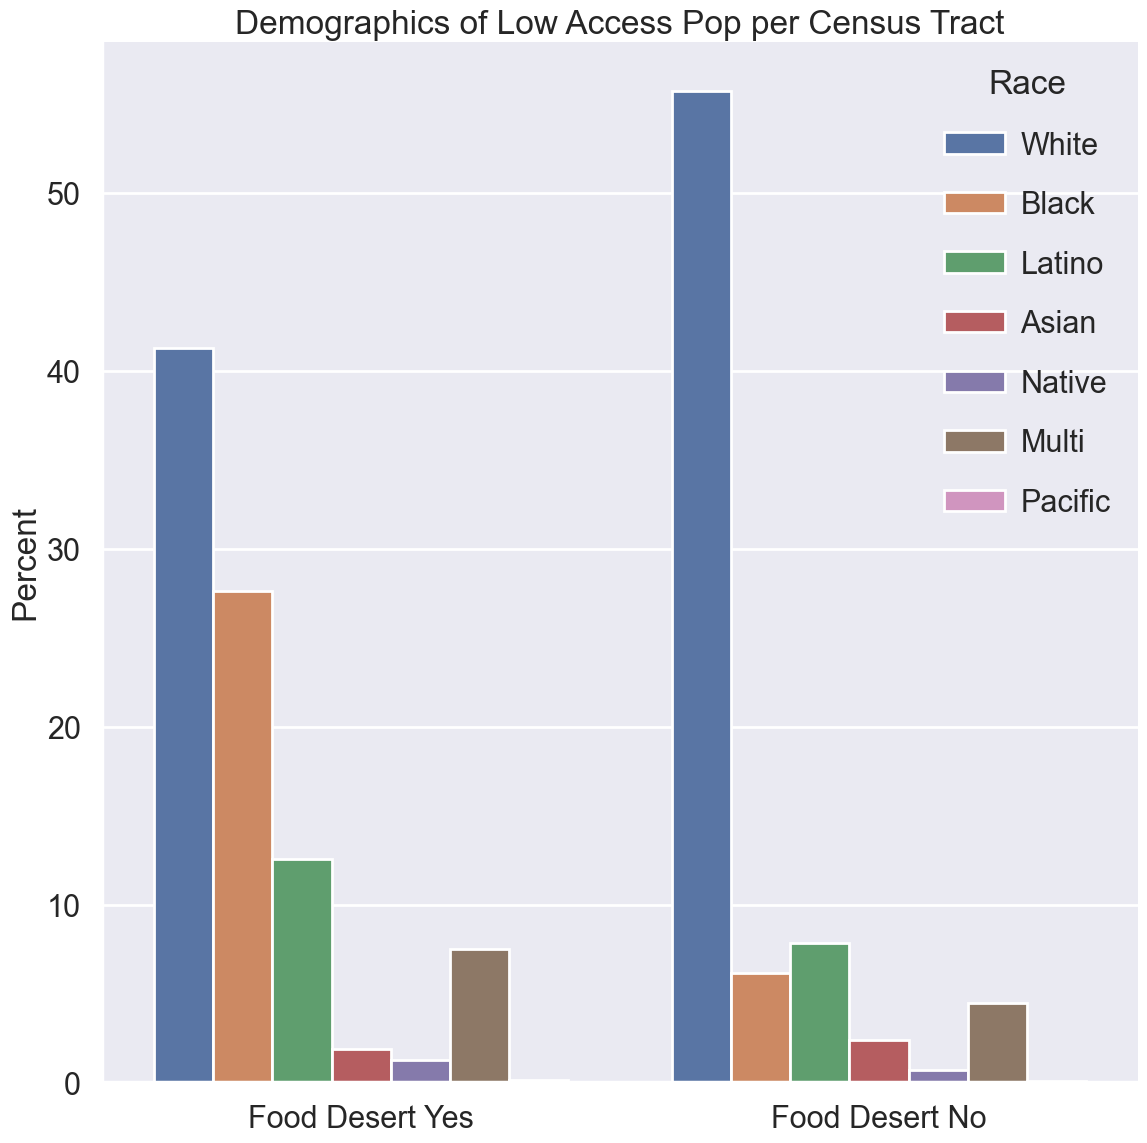

In [234]:
sns.set_theme('poster')
sns.catplot(x='Desert_Status', 
            y='Share', 
            hue='Race', 
            data=race_share_melted, 
            kind='bar', 
            orient='v',
            legend_out=False,
            height=12, 
            aspect=1)\
    .set(ylabel='Percent', xlabel='', title='Demographics of Low Access Pop per Census Tract')\
    .set_xticklabels(['Food Desert Yes', 'Food Desert No'])

In [236]:
df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_halfAnd10',
       'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate',
       'MedianFamilyIncome', 'LAhalfand10', 'LATracts_half',
       'LATractsVehicle_20', 'LAPOP05_10', 'LALOWI05_10', 'lapophalf',
       'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf',
       'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf',
       'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf',
       'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf',
       'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf',
       'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf',
       'lasnaphalfshare', 'TractKids', 'TractSeniors', 'TractWhite',
       'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'Tra

In [238]:
df.groupby('County')['PovertyRate'].mean().sort_values(ascending=False).head(10)

/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/ipykernel_67268/2665478600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('County')['PovertyRate'].mean().sort_values(ascending=False).head(10)


County
Mellette County         48.300000
Corson County           43.900000
East Carroll Parish     43.433333
Clinch County           42.600000
Issaquena County        41.700000
Radford city            41.066667
Ziebach County          41.000000
Kusilvak Census Area    40.500000
Zavala County           39.450000
Tensas Parish           38.900000
Name: PovertyRate, dtype: float64

In [239]:
round(df.groupby('County')['MedianFamilyIncome'].median()).sort_values(ascending=False).head(10)

/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/ipykernel_67268/452270673.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(df.groupby('County')['MedianFamilyIncome'].median()).sort_values(ascending=False).head(10)


County
Falls Church city    195150.0
Loudoun County       153527.0
Arlington County     152619.0
Marin County         145030.0
Alexandria city      141428.0
Fairfax County       140962.0
Los Alamos County    140766.0
Morris County        139875.0
Fairfax city         137763.0
New York County      137293.0
Name: MedianFamilyIncome, dtype: float64

In [240]:
income_yes = df['MedianFamilyIncome'].loc[df['is_desert'] == 1].to_frame().mean()
income_no = df['MedianFamilyIncome'].loc[df['is_desert'] == 0].to_frame().mean()

In [241]:
income_df = pd.concat([income_no, income_yes], axis=1)

In [242]:
income_df.reset_index(inplace=True)
income_df.rename({1:'Yes Food Desert',0:'No Food Desert'}, inplace=True, axis=1)

In [243]:
income_df.set_index('index', inplace=True)

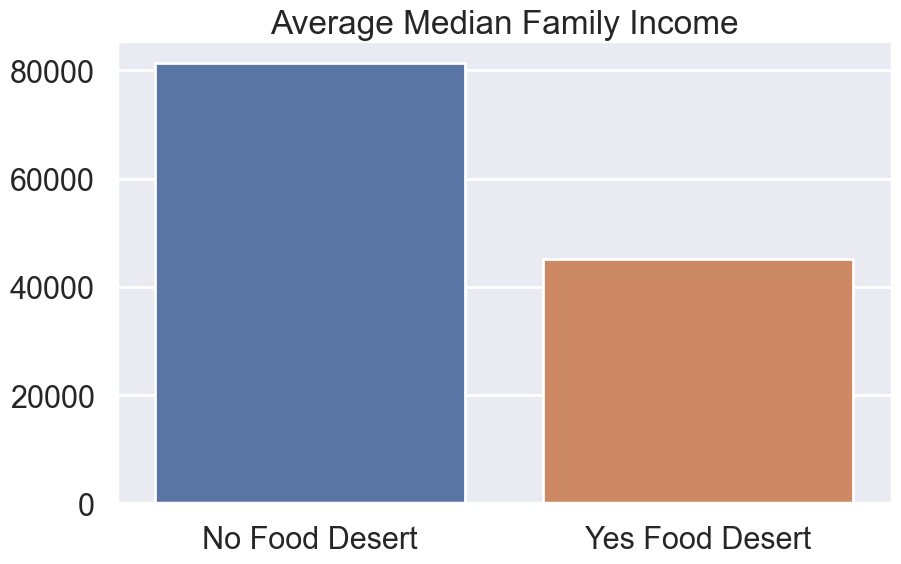

In [245]:
sns.set_theme('poster')
plt.figure(figsize=(10,6))
sns.barplot(data=income_df)
plt.title('Average Median Family Income')

plt.show();

In [266]:
def lmplot(data, x, y, xlabel, ylabel, title, height=12, aspect=1, theme='poster', target='LILATracts_halfAnd10',\
          style='darkgrid'):
    '''Creates lmplot to comepare two variables vs the target 
    Enter dataframe, x, y, xlabel, ylabel, title.
    Height and aspect have default values
    Seaborn theme default poster, theme to darkgrid
    Target default to LILATracts_halfAnd10'''
    sns.set_style(style)
    sns.set_theme(theme)
    sns.lmplot(x=x, 
               y=y,  
               data=data,
              height=20,
              aspect=1,
               legend_out=False,
              hue=target)\
        .set(ylabel=ylabel, 
             xlabel=xlabel, 
             title=title)\
        ._legend.set_title('Target')
    plt.show();

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


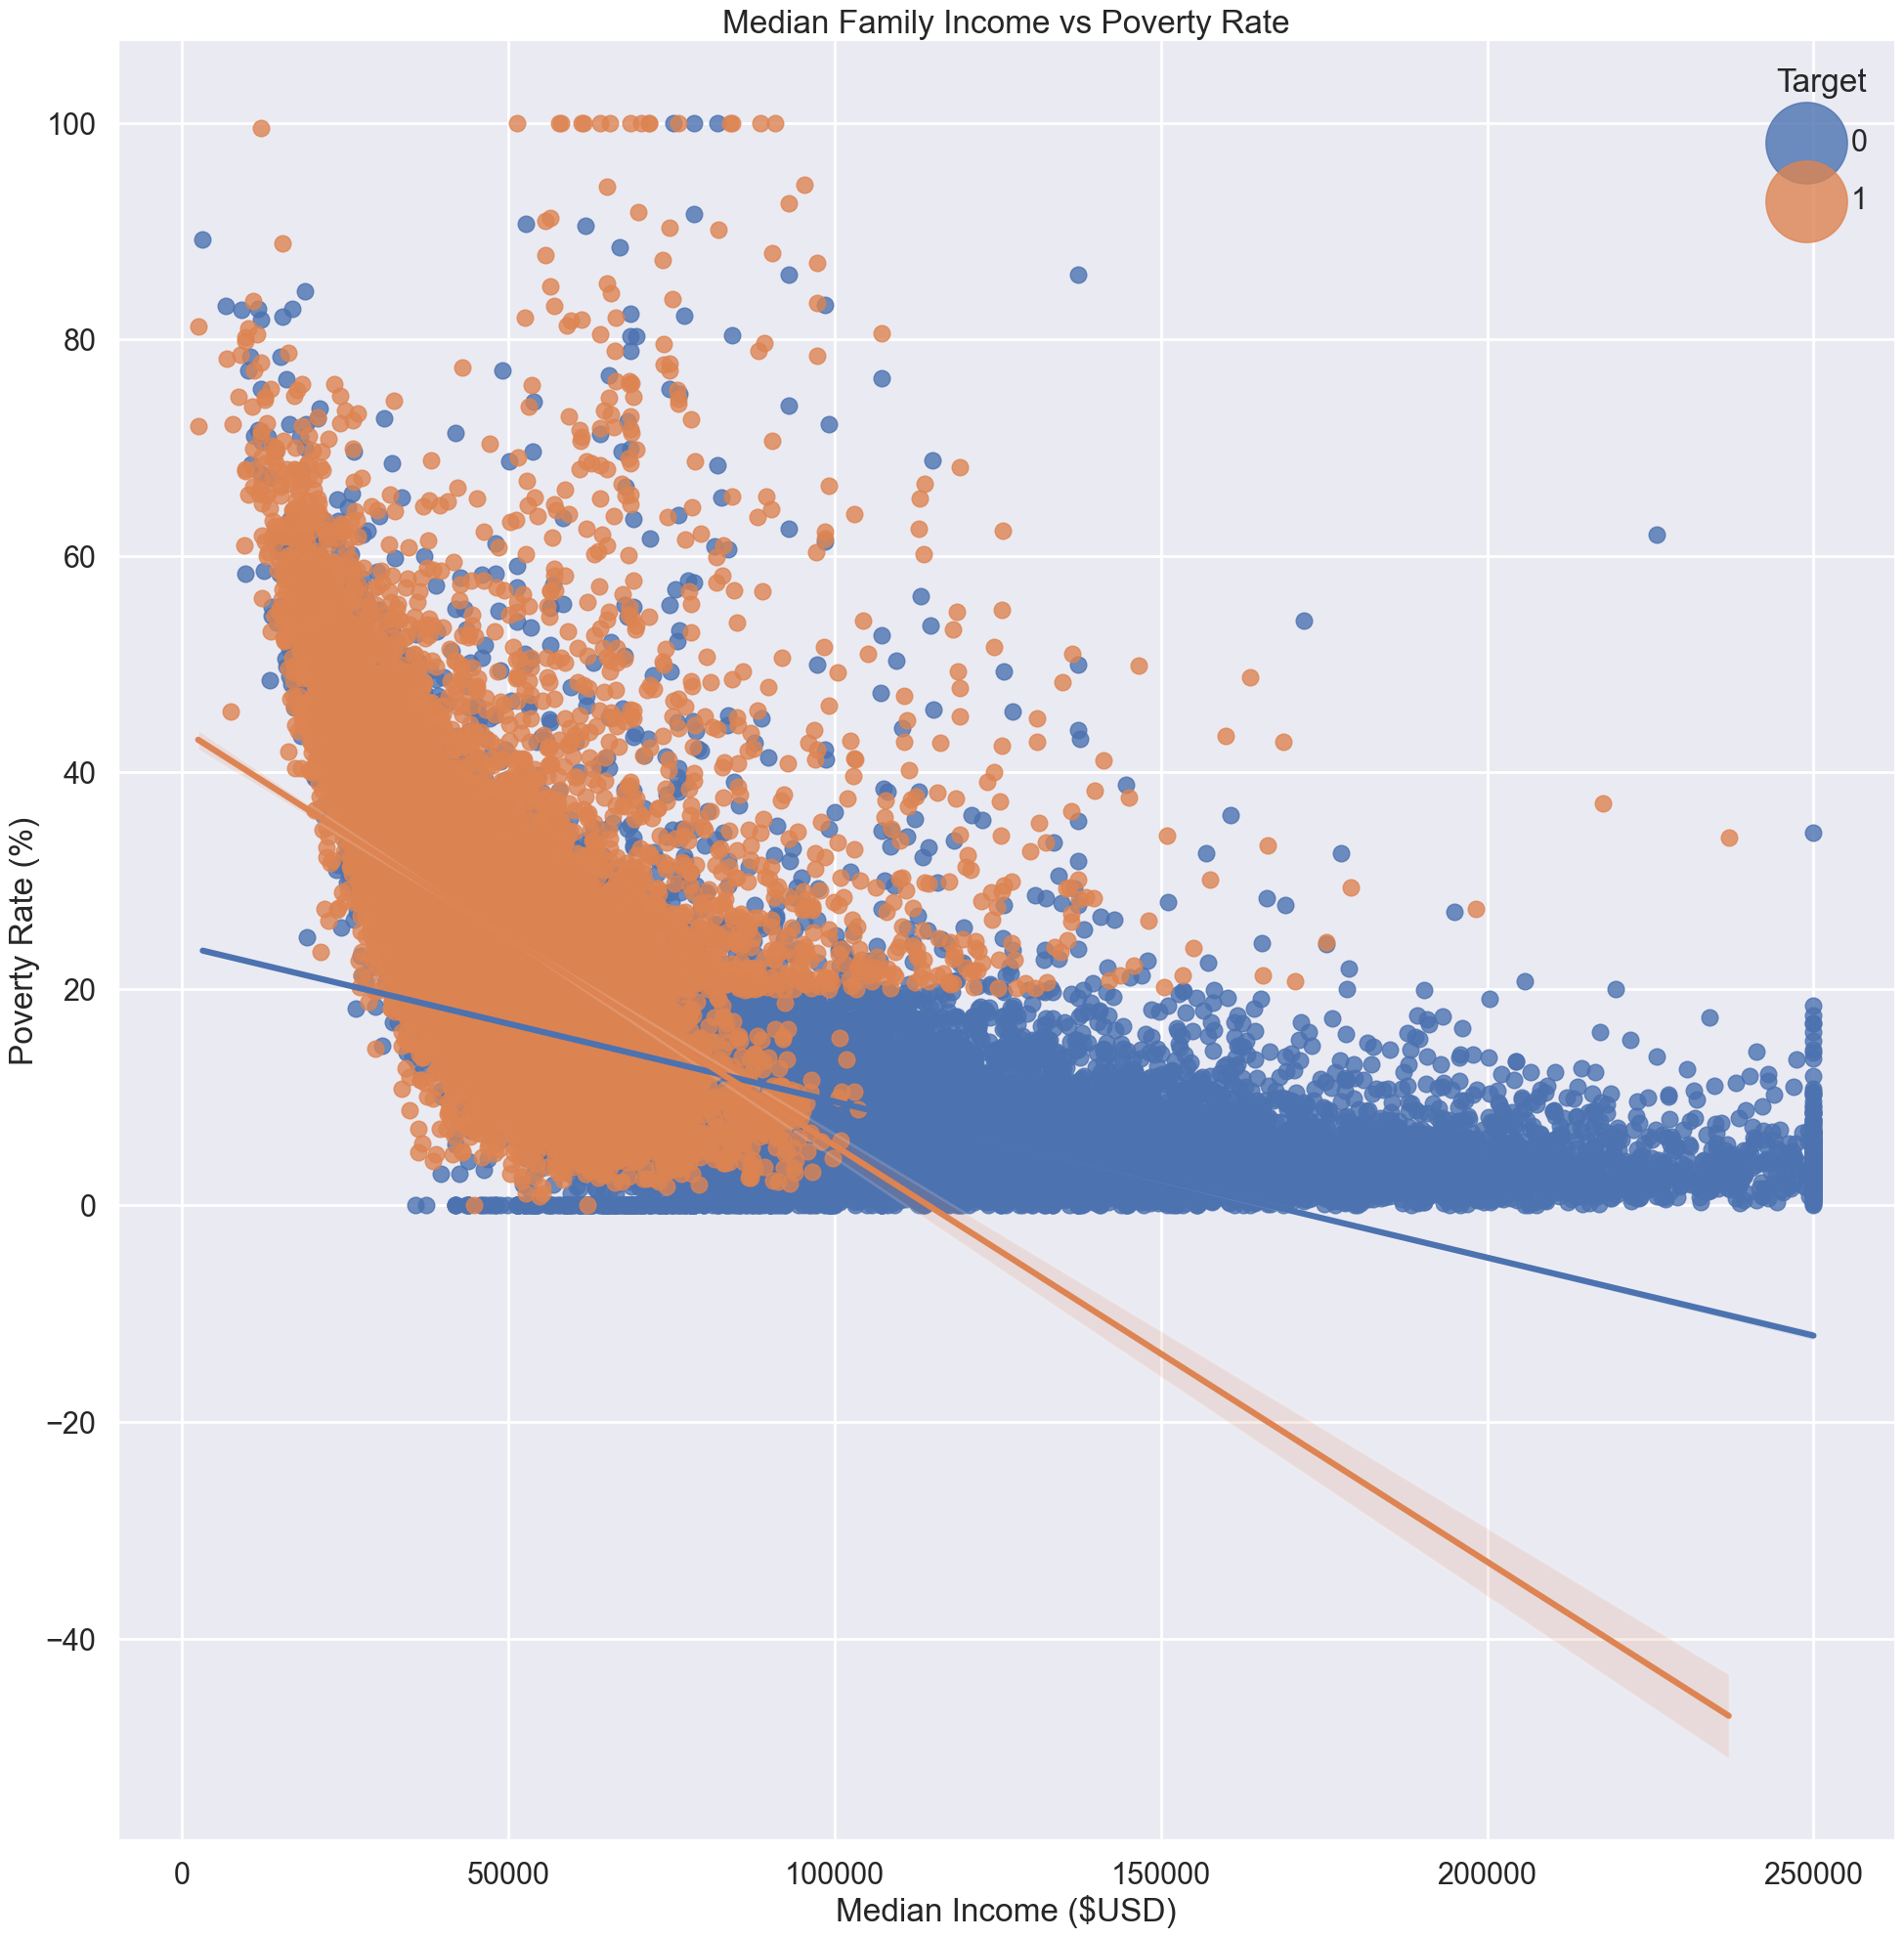

In [267]:
lmplot(df, 'MedianFamilyIncome', 'PovertyRate', 'Median Income ($USD)', 'Poverty Rate (%)',\
      'Median Family Income vs Poverty Rate')

In [269]:
hunv_yes = df['lahunvhalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
hunv_no = df['lahunvhalfshare'].loc[df['is_desert'] == 0].to_frame().mean()

In [270]:
hunv_df = pd.concat([hunv_no, hunv_yes], axis=1)
hunv_df

0          1
lahunvhalfshare  3.222761  14.386054

In [271]:
hunv_df.rename({0:'Food Desert No',
               1:'Food Desert Yes'},
              inplace=True,
              axis=1)

In [272]:
hunv_df

Food Desert No  Food Desert Yes
lahunvhalfshare        3.222761        14.386054

NameError: name 'save_fig' is not defined

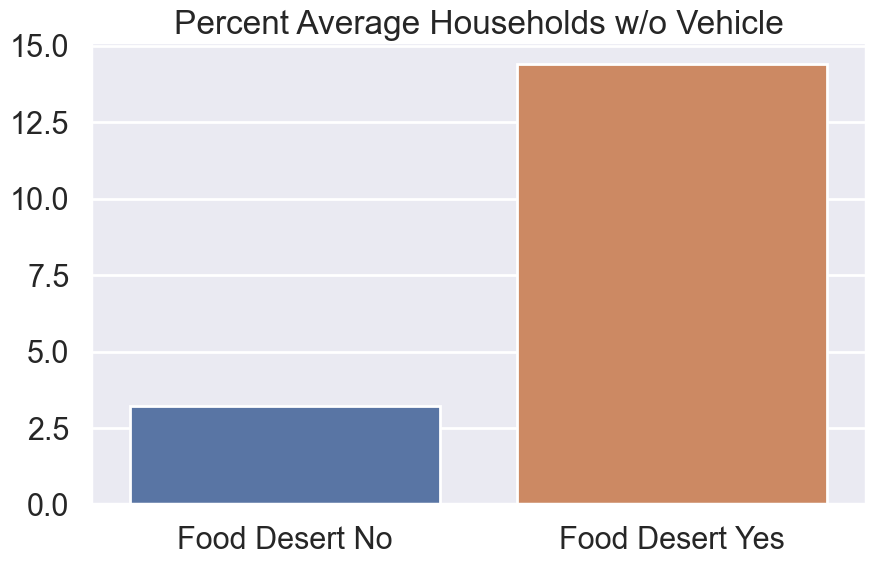

In [ ]:
# visualize low access households without vehicle access vs. target
sns.set_theme('poster')
plt.figure(figsize=(10,6))
sns.barplot(data=hunv_df)
plt.title('Percent Average Households w/o Vehicle')
plt.show();

In [274]:
# create binary dataframe with target
snap_yes = df['lasnaphalfshare'].loc[df['is_desert'] == 1].to_frame().mean()
snap_no = df['lasnaphalfshare'].loc[df['is_desert'] == 0].to_frame().mean()

In [275]:
snap_df = pd.concat([snap_no, snap_yes], axis=1)

In [276]:
# rename columns
snap_df.rename({0:'Food Desert No',
               1:'Food Desert Yes'},
              inplace=True,
              axis=1)

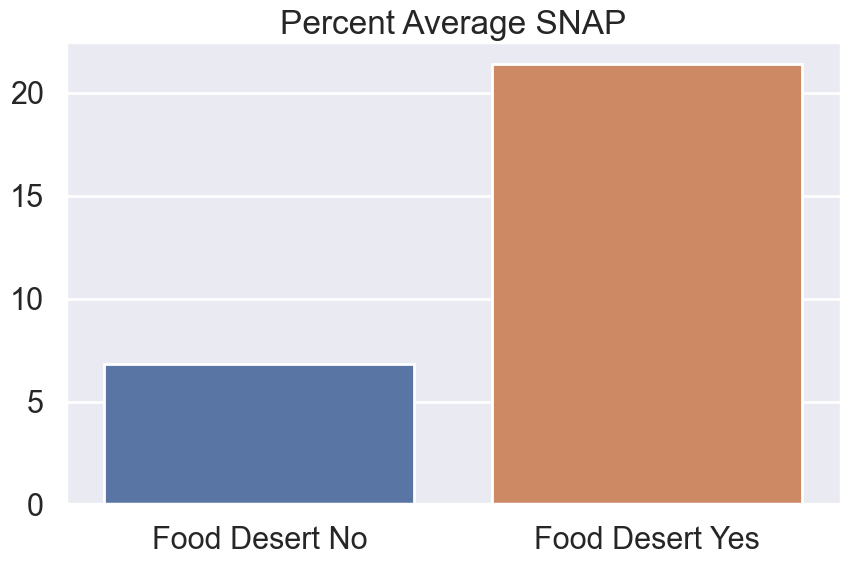

In [278]:
# visualize low access snap vs. target
sns.set_theme('poster')
plt.figure(figsize=(10,6))
sns.barplot(data=snap_df)
plt.title('Percent Average SNAP')
plt.show();